In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import time
import math
from collections import Counter
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
from IPython.core.interactiveshell import InteractiveShell

InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_info_rows', 500)
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [3]:
data = pd.read_csv("../IS5126_Team07_Dataset/airbnb_listings_full.csv")

/NAS/home01/toshal/anaconda3/envs/myenv/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (16,35,48,67,75,76,77,78,79,80,81,82,86,87,88,89,90,91,92,93,94,95,97,98,99,100,102,103,104,105,106,107,108) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
print(str(list(data.columns)))

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description', 'neighborhood_overview', 'picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90', 'availability_365', 

## Exploring the data stats

In [5]:
print("Number of rows: ",len(data.index))
print("Number of cols: ",len(data.columns))

Number of rows:  147557
Number of cols:  109


In [6]:
data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,scrapped_date,summary,space,experiences_offered,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,xl_picture_url,street,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,bed_type,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,requires_license,jurisdiction_names,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,49091,https://www.airbnb.com/rooms/49091,20210225053324,2021-02-26,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,NaN,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,Singapore,I am a private tutor by profession. My husband...,within an hour,100%,NaN,f,https://z0.muscache.cn/im/pictures/user/5c755a...,https://z0.muscache.cn/im/pictures/user/5c755a...,Woodlands,2.0,2.0,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,NaN,Woodlands,North Region,1.44255,103.79580,Private room in apartment,Private room,1,NaN,1 bath,1.0,1.0,"[""TV"", ""Cable TV"", ""Washer"", ""Long term stays ...",$79.00,180,360,180.0,180.0,360.0,360.0,180.0,360.0,NaN,t,30,60,90,365,2021-02-26,1,0,0.0,2013-10-21,2013-10-21,94.0,10.0,10.0,10.0,10.0,8.0,8.0,NaN,f,2,0,2,0,0.01,03-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,50646,https://www.airbnb.com/rooms/50646,20210225053324,2021-02-25,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",a few days or more,0%,NaN,f,https://a0.muscache.com/im/pictures/user/8fd2c...,https://a0.muscache.com/im/pictures/user/8fd2c...,Bukit Timah,1.0,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Singapore, Singapore",Bukit Timah,Central Region,1.33235,103.78521,Private room in apartment,Private room,2,NaN,1 bath,1.0,1.0,"[""TV"", ""Cable TV"", ""Washer"", ""Gym"", ""Long term...",$80.00,90,730,90.0,90.0,730.0,730.0,90.0,730.0,NaN,t,30,60,90,365,2021-02-25,18,0,0.0,2014-04-18,2014-12-26,91.0,9.0,10.0,10.0,10.0,9.0,9.0,NaN,f,1,0,1,0,0.22,03-2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,56334,https://www.airbnb.com/rooms/56334,20210225053324,2021-02-26,COZICOMFORT,<b>The space</b><br />This is Room

#### Number of null values in each of the columns

In [7]:
x = data.isna().sum().reset_index()
x.columns = ['col','na_rows']
x['na_rows'] = x['na_rows'].apply(lambda x: x*100/len(data.index))
x

,col,na_rows
0,id,0.000000
1,listing_url,0.000000
2,scrape_id,0.000000
3,last_scraped,0.000000
4,name,0.018976
5,description,2.492596
6,neighborhood_overview,39.493213
7,picture_url,0.000000
8,host_id,0.000000
9,host_url,0.000000


# Data Cleaning

### Defining new DataFrame

In [8]:
df = pd.DataFrame()
df['listing_id'] = data['id']

In [9]:
data = data.where(pd.notnull(data), None)
data.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,scrapped_date,summary,space,experiences_offered,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,xl_picture_url,street,city,state,zipcode,market,smart_location,country_code,country,is_location_exact,bed_type,square_feet,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,requires_license,jurisdiction_names,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification
0,49091,https://www.airbnb.com/rooms/49091,20210225053324,2021-02-26,COZICOMFORT LONG TERM STAY ROOM 2,<b>The space</b><br />This is Room No. 2.(avai...,None,https://a0.muscache.com/pictures/24485541/67b0...,266763,https://www.airbnb.com/users/show/266763,Francesca,2010-10-20,Singapore,I am a private tutor by profession. My husband...,within an hour,100%,None,f,https://z0.muscache.cn/im/pictures/user/5c755a...,https://z0.muscache.cn/im/pictures/user/5c755a...,Woodlands,2,2,"['email', 'phone', 'facebook', 'reviews', 'jum...",t,t,None,Woodlands,North Region,1.44255,103.796,Private room in apartment,Private room,1,None,1 bath,1,1,"[""TV"", ""Cable TV"", ""Washer"", ""Long term stays ...",$79.00,180,360,180,180,360,360,180,360,None,t,30,60,90,365,2021-02-26,1,0,0,2013-10-21,2013-10-21,94,10,10,10,10,8,8,None,f,2,0,2,0,0.01,03-2019,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,50646,https://www.airbnb.com/rooms/50646,20210225053324,2021-02-25,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,The serenity & quiet surrounding makes it an i...,https://a0.muscache.com/pictures/36342984/670d...,227796,https://www.airbnb.com/users/show/227796,Sujatha,2010-09-08,"Singapore, Singapore","I am a working professional, living in Singapo...",a few days or more,0%,None,f,https://a0.muscache.com/im/pictures/user/8fd2c...,https://a0.muscache.com/im/pictures/user/8fd2c...,Bukit Timah,1,1,"['email', 'phone', 'facebook', 'reviews', 'off...",t,t,"Singapore, Singapore",Bukit Timah,Central Region,1.33235,103.785,Private room in apartment,Private room,2,None,1 bath,1,1,"[""TV"", ""Cable TV"", ""Washer"", ""Gym"", ""Long term...",$80.00,90,730,90,90,730,730,90,730,None,t,30,60,90,365,2021-02-25,18,0,0,2014-04-18,2014-12-26,91,9,10,10,10,9,9,None,f,1,0,1,0,0.22,03-2019,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
2,56334,https://www.airbnb.com/rooms/56334,20210225053324,2021-02-26,COZICOMFORT,<b>The space</b><br />This is Ro

### Converting important descriptive text into boolean columns

Important columns which describe the listing, or are useful to help the Airbnb guest

In [10]:
df['neighborhood_overview'] = data['neighborhood_overview'].apply(lambda x: 1 if x is not None else 0)
df['neighborhood_overview']

0         0
1         1
2         0
3         0
4         0
         ..
147552    0
147553    0
147554    1
147555    1
147556    1
Name: neighborhood_overview, Length: 147557, dtype: int64

In [11]:
df['listing_description'] = data.apply(lambda x: 1 if x['description'] is not None or x['summary'] is not None or x['space'] is not None or x['notes'] is not None or x['interaction'] is not None else 0, axis=1)
df['listing_description']

0         1
1         1
2         1
3         1
4         1
         ..
147552    1
147553    1
147554    1
147555    1
147556    1
Name: listing_description, Length: 147557, dtype: int64

## Defining some cleaning functions

In [12]:
#calculate day difference    
def day_differ(time1,time2):
    try:
        if time1<=time2:
            return (time2-time1).days
        else:
            return None
    except Exception:pass
    
def get_bool(x):
    if x == 't':
        return 1
    elif x == 'f':
        return 0
    else:
        return 0
    
def get_int(x,s):
    x = str(x)
    n_x = x.strip(s)
    return n_x


## Host features

### Calculating the experience of the host

We calculate the experience of the hosts based on how long he has been on the AirBnb platform.

In [13]:
# data['host_since'] = data['host_since'].where(pd.notnull(data['host_since']), 0)
df['last_scraped']=data['last_scraped'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d") if x is not None else None)
df['host_since']=data['host_since'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d") if x is not None else None)

In [14]:
df['experience'] = df.apply(lambda x: day_differ(x['host_since'], x['last_scraped']),axis=1)
df['experience'] = df['experience'].where(pd.notnull(data['host_since']), 0)
df['experience'] = df['experience'].apply(lambda x:x/365)
del df['host_since']
df['experience']

0         10.361644
1         10.473973
2         10.361644
3         10.084932
4         10.084932
            ...    
147552     0.019178
147553     2.350685
147554     2.452055
147555     0.016438
147556     3.624658
Name: experience, Length: 147557, dtype: float64

### Host descriptors

host_response_time \
host_response_rate \
host_acceptance_rate \
host_is_superhost \
host_total_listings_count \
is_host_verified 

In [15]:
df['host_about'] = data['host_about']

### Unique values in host response time

we score it based on the following order

within an hour > within a few hours > within a day > a few days or more > None

In [16]:
def get_response_time_score(x):
    if x == 'within an hour':
        return 4
    elif x == 'within a few hours':
        return 3
    elif x == 'within a day':
        return 2
    elif x == 'a few days or more':
        return 1
    else: return None


data['host_response_time'].unique()
df['host_response_time'] = data['host_response_time'].apply(lambda x: get_response_time_score(x))
df['host_response_time']

array(['within an hour', 'a few days or more', 'within a day',
       'within a few hours', None], dtype=object)

0         4.0
1         1.0
2         4.0
3         2.0
4         2.0
         ... 
147552    NaN
147553    NaN
147554    4.0
147555    NaN
147556    4.0
Name: host_response_time, Length: 147557, dtype: float64

In [17]:
data['host_response_rate'].unique()

df['host_response_rate'] = data['host_response_rate'].apply(lambda x : get_int(x,'%') if x is not None else 0)
df['host_response_rate'].head()

array(['100%', '0%', '93%', '33%', None, '25%', '50%', '97%', '40%',
       '67%', '94%', '92%', '83%', '17%', '88%', '98%', '90%', '71%',
       '70%', '60%', '80%', '11%', '53%', '43%', '75%', '86%', '30%',
       '46%', '10%', '81%', '95%', '85%', '87%', '13%', '96%', '99%',
       '20%', '82%', '65%', '89%', '84%', '91%', '18%', '29%', '44%',
       '78%', '57%', '68%', '6%', '21%', '14%', '48%', '22%', '79%',
       '38%', '63%', '73%', '56%', '54%', '62%', '77%', '36%', '12%',
       '55%', '5%', '69%', '45%', '28%', '74%', '59%', '9%', '52%', '64%',
       '23%', '76%', '8%', '37%', '66%', '19%', '42%', '4%', '24%', '47%',
       '58%', '35%', '27%', '72%', '61%', '34%', '32%', '41%', '31%',
       '51%', '49%'], dtype=object)

0    100
1      0
2    100
3    100
4    100
Name: host_response_rate, dtype: object

In [18]:
data['host_is_superhost'].unique()
df['host_is_superhost'] = data['host_is_superhost'].apply(lambda x: get_bool(x))
df['host_is_superhost']
# df['host_is_superhost'] = data['host_is_superhost'].apply(lambda x: get_bool(x))
# print(df['host_is_superhost'].head(),"\n",data['host_is_superhost'].head())

array(['f', 't', None], dtype=object)

0         0
1         0
2         0
3         0
4         0
         ..
147552    0
147553    0
147554    0
147555    0
147556    0
Name: host_is_superhost, Length: 147557, dtype: int64

In [19]:
data['host_total_listings_count'].head()
df['host_total_listings_count'] = data['host_total_listings_count']

0    2
1    1
2    2
3    8
4    8
Name: host_total_listings_count, dtype: object

In [20]:
data['host_neighbourhood'].unique()
df['is_host_neighbourhood_same'] = data.apply(lambda x: 1 if x['host_neighbourhood'] == x['neighbourhood_cleansed'] else 0, axis=1)
df.groupby(['is_host_neighbourhood_same'])['listing_id'].count()

array(['Woodlands', 'Bukit Timah', 'Tampines', 'Bukit Merah',
       'Central Area', 'Geylang', 'Dalston', 'Serangoon', None,
       'Jurong West', 'Bugis/Kampong Glam', 'Chinatown', 'Marine Parade',
       'Kallang', 'Punggol', 'Katong', 'Novena', 'Bedok', 'Tanglin',
       'Queenstown', 'Ang Mo Kio', 'Bukit Batok', 'Arab Street',
       'Choa Chu Kang', 'Hougang', 'Orchard', 'Toa Payoh', 'Pasir Ris',
       'Bukit Panjang', 'Sembawang', 'Bishan', 'Little India',
       'Marina Bay', 'Jurong East', 'Sengkang', 'Yishun', 'Clementi',
       'Riverside', 'West Kowloon', 'Dunbar-Southlands', 'Keppel Bay',
       'Sentosa', 'Fortress Hill', 'Sungei Kadut', 'Suan Luang', 'Rochor',
       'Siam', 'Museum', 'River Valley', 'Downtown Core', 'Newton',
       'Outram', 'Sathorn', 'Singapore River', 'Ban Rim Pha',
       'Southern Islands', 'Lower Sukhumvit', 'Tanjong Pagar',
       'Upper Sukhumvit', 'Mount Faber', 'Bang Kapi', 'Causeway Bay',
       'Holland Village', 'Waikiki', 'Bastille', 'Bo

is_host_neighbourhood_same
0    91160
1    56397
Name: listing_id, dtype: int64

### Host verification scores

In [21]:
import re
import collections

verifications = []

_ = data['host_verifications'].apply(lambda x: verifications.extend(re.findall(r'[a-zA-Z_]+',x)))
verifications = collections.Counter(verifications)
verifications

Counter({'email': 134555,
         'phone': 146627,
         'facebook': 12626,
         'reviews': 90950,
         'jumio': 79830,
         'offline_government_id': 66666,
         'selfie': 56227,
         'government_id': 105691,
         'identity_manual': 51769,
         'work_email': 17813,
         'manual_offline': 1941,
         'kba': 347,
         'manual_online': 485,
         'google': 7324,
         'weibo': 3553,
         'zhima_selfie': 1029,
         'None': 228,
         'sesame': 80,
         'sesame_offline': 80})

In [22]:
top5_verifications = ['email','phone','facebook','reviews','offline_government_id','government_id']

def get_verification_score(x):
    score=0
    for vc in top5_verifications:
        if vc in x:
            score += 1 
    return score
    
df['host_verification_score'] = data['host_verifications'].apply(lambda x: get_verification_score(x))
df['host_verification_score'] = df['host_verification_score'].apply(lambda x: 5 if x == 6 else x)
df['host_verification_score'] 

0         5
1         5
2         5
3         3
4         3
         ..
147552    3
147553    3
147554    4
147555    3
147556    5
Name: host_verification_score, Length: 147557, dtype: int64

In [23]:
df['calculated_host_listings_count'] = data['calculated_host_listings_count']
df['calculated_host_listings_count_entire_homes'] = data['calculated_host_listings_count_entire_homes']
df['calculated_host_listings_count_private_rooms'] = data['calculated_host_listings_count_private_rooms']
df['calculated_host_listings_count_shared_rooms'] = data['calculated_host_listings_count_shared_rooms']

In [24]:
df.head()

,listing_id,neighborhood_overview,listing_description,last_scraped,experience,host_about,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,49091,0,1,2021-02-26,10.361644,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0
1,50646,1,1,2021-02-25,10.473973,"I am a working professional, living in Singapo...",1.0,0,0,1,1,5,1,0,1,0
2,56334,0,1,2021-02-26,10.361644,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0
3,71609,0,1,2021-02-26,10.084932,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,2.0,100,0,8,1,3,8,0,8,0
4,71896,0,1,2021-02-26,10.084932,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,2.0,100,0,8,1,3,8,0,8,0


## Neighbourhood and Listing

neighbourhood \
Market (check values) \
property_type \
room_type \
accommodates \
bathrooms \
bedrooms \
beds \
bed_type \
amenities


#### Neighbourhood

In [25]:
data['neighbourhood_cleansed'].unique()
data['neighbourhood_group_cleansed'].unique()

df['neighbourhood'] = data['neighbourhood_cleansed']

array(['Woodlands', 'Bukit Timah', 'Tampines', 'Bukit Merah', 'Newton',
       'Geylang', 'Novena', 'River Valley', 'Serangoon', 'Jurong West',
       'Rochor', 'Queenstown', 'Downtown Core', 'Marine Parade', 'Outram',
       'Punggol', 'Bedok', 'Kallang', 'Singapore River', 'Tanglin',
       'Pasir Ris', 'Ang Mo Kio', 'Bukit Batok', 'Museum',
       'Choa Chu Kang', 'Hougang', 'Toa Payoh', 'Bukit Panjang',
       'Sembawang', 'Bishan', 'Yishun', 'Sengkang', 'Clementi',
       'Jurong East', 'Mandai', 'Changi', 'Western Water Catchment',
       'Orchard', 'Southern Islands', 'Tuas', 'Sungei Kadut', 'Pioneer',
       'Central Water Catchment', 'Marina South', 'Lim Chu Kang',
       'Paya Lebar', 'Boon Lay'], dtype=object)

array(['North Region', 'Central Region', 'East Region',
       'North-East Region', 'West Region'], dtype=object)

#### Property

In [26]:
print("property_type: ",data['property_type'].unique())
print("room_type: ",data['room_type'].unique())
print("bathrooms: ",data['bathrooms'].unique())
print("bathrooms_text: ",data['bathrooms_text'].unique())
print("bedrooms: ", data['bedrooms'].unique())
print("beds: ", data['beds'].unique())
print("bed_type: ", data['bed_type'].unique())


def get_baths(row):
    baths = row['bathrooms']
    if baths is None:
        try:
            baths = re.findall(r'[0-9]+',row['bathrooms_text'])[0]
        except: baths = 1
    return baths

# df['property_type'] = data['property_type']
df['room_type'] = data['room_type']
df['bathrooms'] = data.apply(lambda x: get_baths(x), axis=1)
df['bedrooms'] = data['bedrooms']
df['beds'] = data['beds']
# df['bed_type'] = data['bed_type']
df['accommodates'] = data['accommodates']

property_type:  ['Private room in apartment' 'Private room in villa'
 'Private room in house' 'Private room in townhouse' 'Private room'
 'Private room in condominium' 'Entire apartment' 'Entire loft'
 'Entire house' 'Shared room in apartment' 'Private room in earth house'
 'Entire townhouse' 'Private room in guest suite'
 'Private room in bed and breakfast' 'Shared room in bed and breakfast'
 'Room in bed and breakfast' 'Entire condominium'
 'Room in serviced apartment' 'Room in aparthotel' 'Shared room in hostel'
 'Room in hostel' 'Private room in hostel' 'Entire serviced apartment'
 'Shared room in house' 'Private room in bungalow' 'Entire place'
 'Private room in guesthouse' 'Shared room in condominium' 'Room in hotel'
 'Shared room in townhouse' 'Entire chalet'
 'Private room in serviced apartment' 'Private room in loft' 'Shared room'
 'Room in boutique hotel' 'Tiny house' 'Shared room in guesthouse'
 'Entire guesthouse' 'Tent' 'Entire guest suite' 'Boat' 'Entire villa'
 'Shared r

In [27]:
print(data['room_type'].unique())
df = pd.concat([df, pd.get_dummies(df['room_type'], prefix='room_type')],axis=1)
del df['room_type']
df.head()

['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']


,listing_id,neighborhood_overview,listing_description,last_scraped,experience,host_about,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,bathrooms,bedrooms,beds,accommodates,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,49091,0,1,2021-02-26,10.361644,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0
1,50646,1,1,2021-02-25,10.473973,"I am a working professional, living in Singapo...",1.0,0,0,1,1,5,1,0,1,0,Bukit Timah,1,1,1,2,0,0,1,0
2,56334,0,1,2021-02-26,10.361644,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0
3,71609,0,1,2021-02-26,10.084932,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,2.0,100,0,8,1,3,8,0,8,0,Tampines,1,2,3,6,0,0,1,0
4,71896,0,1,2021-02-26,10.084932,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,2.0,100,0,8,1,3,8,0,8,0,Tampines,1,1,1,3,0,0,1,0


In [28]:
df['is_location_exact'] = data['is_location_exact'].apply(lambda x: get_bool(x))
df['is_location_exact']

0         0
1         0
2         0
3         0
4         0
         ..
147552    1
147553    0
147554    1
147555    1
147556    1
Name: is_location_exact, Length: 147557, dtype: int64

#### Amentities provided in the bnb

In [29]:
print(data['amenities'].unique())

['["TV", "Cable TV", "Washer", "Long term stays allowed", "Wifi", "Elevator", "Air conditioning"]'
 '["TV", "Cable TV", "Washer", "Gym", "Long term stays allowed", "Shampoo", "Wifi", "Kitchen", "Elevator", "Essentials", "Air conditioning", "Pool"]'
 '["Dryer", "TV", "Cable TV", "Washer", "Wifi", "Kitchen", "Elevator", "Air conditioning"]'
 ...
 '{"Air conditioning",Elevator,Heating,Washer,Essentials,Shampoo,"Lock on bedroom door",Hangers,Iron,"Hot water","Host greets you"}'
 '{TV,Wifi,"Air conditioning",Pool,Kitchen,Gym,Elevator,Washer,Dryer,"Smoke detector","First aid kit",Essentials,Shampoo,Hangers,"Private living room"}'
 '{TV,Wifi,"Air conditioning",Pool,Kitchen,"Free parking on premises","Smoking allowed",Gym,Elevator,Heating,"Suitable for events",Washer,Dryer,Essentials,Shampoo,"Lock on bedroom door",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Hot water","Long term stays allowed","Step-free access","Accessible-height bed","Step-free access","Step-free access","Wide ent

In [30]:
import re
import collections

amenities = []

_ = data['amenities'].apply(lambda x: amenities.extend(re.findall(r'[a-zA-Z_ ]+',x)))
amenities = collections.Counter(amenities)
amenities.most_common()

[(' ', 442682),
 ('Air conditioning', 142485),
 ('Wifi', 142231),
 ('Washer', 130705),
 ('Essentials', 129294),
 ('Kitchen', 120986),
 ('Hangers', 119922),
 ('Iron', 112233),
 ('TV', 108161),
 ('Hair dryer', 107998),
 ('Shampoo', 105351),
 ('Elevator', 97304),
 ('Dryer', 95892),
 ('Hot water', 85153),
 ('Laptop friendly workspace', 82252),
 ('Lock on bedroom door', 78472),
 ('Pool', 74859),
 ('Long term stays allowed', 66955),
 ('Gym', 61682),
 ('Refrigerator', 59164),
 ('Fire extinguisher', 54187),
 ('Microwave', 52545),
 ('Dishes and silverware', 48405),
 ('Heating', 48383),
 ('Bed linens', 47860),
 ('Smoke detector', 45468),
 ('Stove', 44526),
 ('Free parking on premises', 44125),
 ('Private entrance', 41461),
 ('Cooking basics', 38931),
 ('First aid kit', 38356),
 ('in', 36477),
 ('Family', 34951),
 ('kid friendly', 34951),
 ('Luggage dropoff allowed', 34619),
 ('Host greets you', 29642),
 ('Extra pillows and blankets', 29234),
 ('Internet', 28110),
 ('Oven', 25434),
 ('Paid parkin

In [31]:
top5_amenities = ['Air conditioning','Wifi','Washer','Essentials','Kitchen']

def get_amenities_score(x):
    score=0
    for vc in top5_amenities:
        if vc in x:
            score += 1 
    return score
    
df['amenities_score'] = data['amenities'].apply(lambda x: get_amenities_score(x))
df['amenities_score'] 

0         3
1         5
2         4
3         5
4         5
         ..
147552    5
147553    5
147554    5
147555    5
147556    5
Name: amenities_score, Length: 147557, dtype: int64

### Price

In [32]:
print(data['price'].unique())

['$79.00' '$80.00' '$66.00' ... '$2,705.00' '$866.00' '$3,801.00']


In [33]:
data = data.replace('None', None)
df['price'] = data['price'].apply(lambda x: float(str(x).replace(',','').strip('$')))
df['security_deposit'] = data.apply(lambda x: float(str(x['security_deposit']).replace(',','').strip('$')) if x['security_deposit'] is not None else 0, axis=1)
df['cleaning_fee'] = data['cleaning_fee'].apply(lambda x: float(str(x).replace(',','').strip('$')) if x is not None else 0)
df['price_for_extra_people'] = data['extra_people'].apply(lambda x: float(str(x).replace(',','').strip('$'))if x is not None else 0)

### Stay

In [34]:
df['guests_included'] = data['guests_included']
df['minimum_nights'] = data['minimum_nights']
df['maximum_nights'] = data['maximum_nights']
# df['has_availability'] = data['has_availability'].apply(lambda x: get_bool(x))
df['availability_30'] = data['availability_30']
df['availability_60'] = data['availability_60']
df['availability_90'] = data['availability_90']
df['availability_365'] = data['availability_365']
df['is_instant_bookable'] = data['instant_bookable'].apply(lambda x: get_bool(x))
# df['is_business_travel_ready'] = data['is_business_travel_ready'].apply(lambda x: get_bool(x))

In [35]:
print(data['cancellation_policy'].unique())
df['cancellation_policy'] = data['cancellation_policy']
df = pd.concat([df, pd.get_dummies(df['cancellation_policy'], prefix='cancellation_policy')],axis=1)
del df['cancellation_policy']

[None 'flexible' 'moderate' 'strict_14_with_grace_period'
 'super_strict_30' 'super_strict_60' 'strict']


In [36]:
df['house_rules'] = data['house_rules'].apply(lambda x: 1 if x is not None else 0)
df['transit'] = data['transit'].apply(lambda x: 1 if x is not None else 0)
df['access'] = data['access'].apply(lambda x: 1 if x is not None else 0)

### Reviews of the listing

In [37]:
df['number_of_reviews'] = data['number_of_reviews']
df['reviews_per_month'] = data['reviews_per_month']
df['number_of_reviews_ltm'] = data['number_of_reviews_ltm']
df['number_of_reviews_l30d'] = data['number_of_reviews_l30d']
df['review_scores_rating'] = data['review_scores_rating']
df['review_scores_accuracy'] = data['review_scores_accuracy']
df['review_scores_cleanliness'] = data['review_scores_cleanliness']
df['review_scores_checkin'] = data['review_scores_checkin']
df['review_scores_communication'] = data['review_scores_communication']
df['review_scores_location'] = data['review_scores_location']
df['review_scores_value'] = data['review_scores_value']

In [38]:
columns = df.columns

In [39]:
columns

Index(['listing_id', 'neighborhood_overview', 'listing_description',
       'last_scraped', 'experience', 'host_about', 'host_response_time',
       'host_response_rate', 'host_is_superhost', 'host_total_listings_count',
       'is_host_neighbourhood_same', 'host_verification_score',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'neighbourhood',
       'bathrooms', 'bedrooms', 'beds', 'accommodates',
       'room_type_Entire home/apt', 'room_type_Hotel room',
       'room_type_Private room', 'room_type_Shared room', 'is_location_exact',
       'amenities_score', 'price', 'security_deposit', 'cleaning_fee',
       'price_for_extra_people', 'guests_included', 'minimum_nights',
       'maximum_nights', 'availability_30', 'availability_60',
       'availability_90', 'availability_365', 'is_instant_bookable',
       'cancellation_polic

In [40]:
len(columns)

59

In [41]:
df.head()

,listing_id,neighborhood_overview,listing_description,last_scraped,experience,host_about,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,bathrooms,bedrooms,beds,accommodates,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,house_rules,transit,access,number_of_reviews,reviews_per_month,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value
0,49091,0,1,2021-02-26,10.361644,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,3,79.0,0.0,0.0,0.0,None,180,360,30,60,90,365,0,0,0,0,0,0,0,0,0,0,1,0.01,0,0,94,10,10,10,10,8,8
1,50646,1,1,2021-02-25,10.473973,"I am a working professional, living in Singapo...",1.0,0,0,1,1,5,1,0,1,0,Bukit Timah,1,1,1,2,0,0,1,0,0,5,80.0,0.0,0.0,0.0,None,90,730,30,60,90,365,0,0,0,0,0,0,0,0,0,0,18,0.22,0,0,91,9,10,10,10,9,9
2,56334,0,1,2021-02-26,10.361644,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,4,66.0,0.0,0.0,0.0,None,6,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0.17,0,0,98,10,10,10,10,8,9
3,71609,0,1,2021-02-26,10.084932,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,2.0,100,0,8,1,3,8,0,8,0,Tampines,1,2,3,6,0,0,1,0,0,5,174.0,0.0,0.0,0.0,None,90,1125,30,60,90,365,1,0,0,0,0,0,0,0,0,0,20,0.18,0,0,89,9,8,9,10,9,9
4,71896,0,1,2021-02-26,10.084932,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,2.0,100,0,8,1,3,8,0,8,0,Tampines,1,1,1,3,0,0,1,0,0,5,79.0,0.0,0.0,0.0,None,90,1125,30,60,90,365,1,0,0,0,0,0,0,0,0,0,24,0.21,0,0,83,8,8,9,9,8,8


In [42]:
df.describe()

,listing_id,neighborhood_overview,listing_description,experience,host_response_time,host_is_superhost,is_host_neighbourhood_same,host_verification_score,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,accommodates,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,house_rules,transit,access,number_of_reviews,number_of_reviews_ltm
count,1.475570e+05,147557.000000,147557.000000,147557.000000,121043.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000
mean,2.502509e+07,0.605068,0.975074,3.745259,3.399602,0.162893,0.382205,3.752950,40.026207,29.236085,8.163428,0.563342,3.331912,0.483955,0.046267,0.429542,0.040235,0.618825,4.512371,168.978517,146.954621,24.434510,13.002846,19.704968,938.094174,14.962055,34.089410,54.855202,218.292972,0.480059,0.176630,0.120177,0.000061,0.552241,0.001247,0.000678,0.427943,0.509383,0.541370,12.954431,4.727651
std,1.142091e+07,0.488838,0.155900,2.092151,0.889737,0.369269,0.485928,1.070782,65.410421,62.635657,22.065879,3.231808,2.581823,0.499744,0.210063,0.495013,0.196511,0.485677,0.889922,364.609973,388.122259,38.489823,20.424493,45.944232,1461.275274,12.473917,24.242609,35.687660,147.432179,0.499604,0.381357,0.325170,0.007810,0.497265,0.035291,0.026024,0.494782,0.499914,0.498287,30.933509,11.001925
min,4.909100e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.640168e+07,0.000000,1.000000,2.030137,3.000000,0.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,65.000000,0.000000,0.000000,0.000000,1.000000,1124.000000,0.000000,4.000000,17.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.612164e+07,1.000000,1.000000,3.764384,4.000000,0.000000,0.000000,4.000000,9.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,120.000000,0.000000,10.000000,0.000000,3.000000,1125.000000,16.000000,41.000000,69.000000,292.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,3.388982e+07,1.000000,1.000000,5.186301,4.000000,0.000000,1.000000,5.000000,50.000000,24.000000,4.000000,0.000000,4.000000,1.000000,0.000000,1.000000,0.000000,1.000000,5.000000,194.000000,200.000000,35.000000,20.000000,15.000000,1125.000000,29.000000,59.000000,89.000000,360.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,10.000000,3.000000
max,4.831350e+07,1.000000,1.000000,11.668493,4.000000,1.000000,1.000000,5.000000,352.000000,347.000000,136.000000,42.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000

In [43]:
df['last_scraped'].describe()

count                  147557
unique                     41
top       2019-05-23 00:00:00
freq                     8325
first     2019-03-18 00:00:00
last      2021-02-27 00:00:00
Name: last_scraped, dtype: object

In [44]:
df['last_scraped'] = df['last_scraped'].apply(lambda x: str(x.month) +'-'+ str(x.year))

## adding tourist data

In [46]:
td = pd.read_excel('../IS5126_Team07_Dataset/TourismData/Singapore Tourism Dataset.xlsx')

In [47]:
td = td.add_prefix('tourism_')
td.head()
td.columns

,tourism_Month Year,tourism_Average Room Rate,tourism_Average Occupancy Rate,tourism_REVPAR,tourism_Available Room Nights,tourism_Room Revenue,tourism_Gross Lettings,tourism_Room Stock,tourism_No. of Accommodations
0,2018-01-01,214.143144,0.834206,178.639513,1736362,3.101826e+08,1.448484e+06,58591,240
1,2018-02-01,224.253423,0.879944,197.330399,1587414,3.132452e+08,1.396835e+06,58593,240
2,2018-03-01,220.110361,0.872020,191.940555,1764808,3.387391e+08,1.538947e+06,58649,240
3,2018-04-01,219.759989,0.852380,187.319094,1754243,3.289902e+08,1.495282e+06,60593,248
4,2018-05-01,207.033959,0.825633,170.933984,1806810,3.088453e+08,1.491761e+06,60576,248


Index(['tourism_Month Year', 'tourism_Average Room Rate',
       'tourism_Average Occupancy Rate', 'tourism_REVPAR',
       'tourism_Available Room Nights', 'tourism_Room Revenue',
       'tourism_Gross Lettings', 'tourism_Room Stock',
       'tourism_No. of Accommodations'],
      dtype='object')

In [48]:
td.columns = ['last_scraped', 'tourism_AverageRoomRate',
       'tourism_AverageOccupancyRate', 'tourism_REVPAR',
       'tourism_AvailableRoomNights', 'tourism_RoomRevenue',
       'tourism_GrossLettings', 'tourism_RoomStock',
       'tourism_Accommodations']

In [49]:
# td['tourism_date_scraped'] = td['tourism_date_scraped'].apply(lambda x: datetime.strptime(x, "%Y-%m-%d"))
td = td[td['last_scraped'] >= datetime(2019,3,1)]

In [50]:
td['last_scraped'] = td['last_scraped'].apply(lambda x: str(x.month) +'-'+ str(x.year))

In [51]:
# td['tourism_date_scraped'] = td['tourism_date_scraped'].apply(lambda x: str(x.month) +'-'+ str(x.year))
td.head()
td['last_scraped'].describe()

,last_scraped,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_REVPAR,tourism_AvailableRoomNights,tourism_RoomRevenue,tourism_GrossLettings,tourism_RoomStock,tourism_Accommodations
14,3-2019,214.835685,0.843158,181.140514,1828569,3.312251e+08,1.541773e+06,60557,248
15,4-2019,214.993821,0.854249,183.658279,1767049,3.249150e+08,1.509500e+06,60554,248
16,5-2019,206.511525,0.819917,169.322258,1811517,3.067104e+08,1.485293e+06,60364,247
17,6-2019,210.584050,0.861435,181.404560,1761383,3.197716e+08,1.517318e+06,60364,247
18,7-2019,218.663164,0.939014,205.327725,1837350,3.775732e+08,1.725297e+06,60181,244


count         24
unique        24
top       2-2021
freq           1
Name: last_scraped, dtype: object

In [52]:
df_added = pd.merge(df,td, on=['last_scraped'])
df_added.head()

,listing_id,neighborhood_overview,listing_description,last_scraped,experience,host_about,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,bathrooms,bedrooms,beds,accommodates,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,house_rules,transit,access,number_of_reviews,reviews_per_month,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_REVPAR,tourism_AvailableRoomNights,tourism_RoomRevenue,tourism_GrossLettings,tourism_RoomStock,tourism_Accommodations
0,49091,0,1,2-2021,10.361644,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,3,79.0,0.0,0.0,0.0,None,180,360,30,60,90,365,0,0,0,0,0,0,0,0,0,0,1,0.01,0,0,94,10,10,10,10,8,8,145.568014,0.415543,60.489742,969726,5.865848e+07,402962.667255,63896,265
1,50646,1,1,2-2021,10.473973,"I am a working professional, living in Singapo...",1.0,0,0,1,1,5,1,0,1,0,Bukit Timah,1,1,1,2,0,0,1,0,0,5,80.0,0.0,0.0,0.0,None,90,730,30,60,90,365,0,0,0,0,0,0,0,0,0,0,18,0.22,0,0,91,9,10,10,10,9,9,145.568014,0.415543,60.489742,969726,5.865848e+07,402962.667255,63896,265
2,56334,0,1,2-2021,10.361644,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,4,66.0,0.0,0.0,0.0,None,6,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0.17,0,0,98,10,10,10,10,8,9,145.568014,0.415543,60.489742,969726,5.865848e+07,402962.667255,63896,265
3,71609,0,1,2-2021,10.084932,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,2.0,100,0,8,1,3,8,0,8,0,Tampines,1,2,3,6,0,0,1,0,0,5,174.0,0.0,0.0,0.0,None,90,1125,30,60,90,365,1,0,0,0,0,0,0,0,0,0,20,0.18,0,0,89,9,8,9,10,9,9,145.568014,0.415543,60.489742,969726,5.865848e+07,402962.667255,63896,265
4,71896,0,1,2-2021,10.084932,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,2.0,100,0,8,1,3,8,0,8,0,Tampines,1,1,1,3,0,0,1,0,0,5,79.0,0.0,0.0,0.0,None,90,1125,30,60,90,365,1,0,0,0,0,0,0,0,0,0,24,0.21,0,0,83,8,8,9,9,8,8,145.568014,0.415543,60.489742,969726,5.865848e+07,402962.667255,63896,265


In [53]:
len(df_added.index)

147557

In [54]:
len(df.index)

147557

In [55]:
df.groupby(['listing_id'])['listing_description'].count().reset_index().describe()

,listing_id,listing_description
count,1.529300e+04,15293.000000
mean,2.840763e+07,9.648663
std,1.175544e+07,6.696209
min,4.909100e+04,1.000000
25%,2.003821e+07,3.000000
50%,3.052464e+07,8.000000
75%,3.808832e+07,16.000000
max,4.831350e+07,21.000000


## Adding weather data

In [56]:
rain = pd.read_csv('../IS5126_Team07_Dataset/WeatherData/rainfall-monthly-total.csv')
humidity = pd.read_csv('../IS5126_Team07_Dataset/WeatherData/relative-humidity-monthly-mean.csv')
temp = pd.read_csv('../IS5126_Team07_Dataset/WeatherData/surface-air-temperature-monthly-mean.csv')

In [57]:
rain.head()
humidity.head()
temp.head()

,month,total_rainfall
0,1982-01,107.1
1,1982-02,27.8
2,1982-03,160.8
3,1982-04,157.0
4,1982-05,102.2


,month,mean_rh
0,1982-01,81.2
1,1982-02,79.5
2,1982-03,82.3
3,1982-04,85.9
4,1982-05,83.2


,month,mean_temp
0,1982-01,25.9
1,1982-02,27.1
2,1982-03,27.2
3,1982-04,27.0
4,1982-05,28.0


In [58]:
rain['month'] = rain['month'].apply(lambda x: datetime.strptime(x, '%Y-%m'))
temp['month'] = temp['month'].apply(lambda x: datetime.strptime(x, '%Y-%m'))
humidity['month'] = humidity['month'].apply(lambda x: datetime.strptime(x, '%Y-%m'))

In [59]:
rain.columns = ['last_scraped','total_rainfall']
temp.columns = ['last_scraped','mean_temp']
humidity.columns = ['last_scraped','mean_humidity']

In [63]:
df_added['last_scraped']=df_added['last_scraped'].apply(lambda x: datetime.strptime(x, "%m-%Y"))

In [64]:
len(df_added.index)

147557

In [65]:
df_added = pd.merge(df_added, rain, on='last_scraped', how = 'left')
df_added = pd.merge(df_added, temp, on='last_scraped', how = 'left')
df_added = pd.merge(df_added, humidity, on='last_scraped', how = 'left')

In [66]:
df_added.head()

,listing_id,neighborhood_overview,listing_description,last_scraped,experience,host_about,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,bathrooms,bedrooms,beds,accommodates,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,house_rules,transit,access,number_of_reviews,reviews_per_month,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_REVPAR,tourism_AvailableRoomNights,tourism_RoomRevenue,tourism_GrossLettings,tourism_RoomStock,tourism_Accommodations,total_rainfall,mean_temp,mean_humidity
0,49091,0,1,2021-02-01,10.361644,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,3,79.0,0.0,0.0,0.0,None,180,360,30,60,90,365,0,0,0,0,0,0,0,0,0,0,1,0.01,0,0,94,10,10,10,10,8,8,145.568014,0.415543,60.489742,969726,5.865848e+07,402962.667255,63896,265,1.0,27.3,73.8
1,50646,1,1,2021-02-01,10.473973,"I am a working professional, living in Singapo...",1.0,0,0,1,1,5,1,0,1,0,Bukit Timah,1,1,1,2,0,0,1,0,0,5,80.0,0.0,0.0,0.0,None,90,730,30,60,90,365,0,0,0,0,0,0,0,0,0,0,18,0.22,0,0,91,9,10,10,10,9,9,145.568014,0.415543,60.489742,969726,5.865848e+07,402962.667255,63896,265,1.0,27.3,73.8
2,56334,0,1,2021-02-01,10.361644,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,4,66.0,0.0,0.0,0.0,None,6,14,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,0.17,0,0,98,10,10,10,10,8,9,145.568014,0.415543,60.489742,969726,5.865848e+07,402962.667255,63896,265,1.0,27.3,73.8
3,71609,0,1,2021-02-01,10.084932,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,2.0,100,0,8,1,3,8,0,8,0,Tampines,1,2,3,6,0,0,1,0,0,5,174.0,0.0,0.0,0.0,None,90,1125,30,60,90,365,1,0,0,0,0,0,0,0,0,0,20,0.18,0,0,89,9,8,9,10,9,9,145.568014,0.415543,60.489742,969726,5.865848e+07,402962.667255,63896,265,1.0,27.3,73.8
4,71896,0,1,2021-02-01,10.084932,Hi My name is Belinda -Housekeeper \r\n\r\nI w...,2.0,100,0,8,1,3,8,0,8,0,Tampines,1,1,1,3,0,0,1,0,0,5,79.0,0.0,0.0,0.0,None,90,1125,30,60,90,365,1,0,0,0,0,0,0,0,0,0,24,0.21,0,0,83,8,8,9,9,8,8,145.568014,0.415543,60.489742,969726,5.865848e+07,402962.667255,63896,265,1.0,27.3,73.8


## Geospatial data

In [67]:
gdata = pd.read_csv("../IS5126_Team07_Dataset/geolocation_features.csv")
gdata.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,Subway_Count_Within_200m,Subway_Count_Within_1000m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Restaurants_Count_Within_200m,Restaurants_Count_Within_1000m,Shops_Count_Within_200m,Shops_Count_Within_1000m,Attractions_Count_Within_200m,Attractions_Count_Within_1000m
0,3022590,Modern Asian Designer Terrace in Central Singa...,3950110,Chris,North-East Region,Serangoon,1.35617,103.86669,Entire home/apt,1821,2,36,2017-09-24,0.44,1,358,0,2,3,47,0,61,0,15,0,0
1,3971438,Beautiful Studio At Farrer Park MRT,14881884,Ace,Central Region,Downtown Core,1.28111,103.85051,Entire home/apt,115,15,0,NaN,NaN,9,216,2,12,4,46,10,524,2,55,0,8
2,4938561,Opposite East Coast Park- In the Heart of East,14569636,Ken,Central Region,Marine Parade,1.29662,103.89330,Entire home/apt,207,45,3,2015-07-08,0.04,3,90,0,2,2,24,0,1,0,0,0,2
3,9075438,Studio @ the heart of Chinatown,23722617,Alex,Central Region,Outram,1.28549,103.84528,Entire home/apt,80,20,9,2019-10-20,0.14,56,88,2,12,8,64,49,567,4,58,1,12
4,11425553,Designer-Chic City Apartment (Suite I),60024674,Mike,Central Region,Novena,1.31688,103.84483,Entire home/apt,105,14,39,2017-04-24,0.65,5,123,0,2,3,41,5,35,4,21,0,1


In [68]:
gdata.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'Subway_Count_Within_200m',
       'Subway_Count_Within_1000m', 'Bus_Count_Within_200m',
       'Bus_Count_Within_1000m', 'Restaurants_Count_Within_200m',
       'Restaurants_Count_Within_1000m', 'Shops_Count_Within_200m',
       'Shops_Count_Within_1000m', 'Attractions_Count_Within_200m',
       'Attractions_Count_Within_1000m'],
      dtype='object')

In [69]:
gdata = gdata[['id','Subway_Count_Within_200m', \
       'Subway_Count_Within_1000m', 'Bus_Count_Within_200m', \
       'Bus_Count_Within_1000m', 'Restaurants_Count_Within_200m', \
       'Restaurants_Count_Within_1000m', 'Shops_Count_Within_200m', \
       'Shops_Count_Within_1000m', 'Attractions_Count_Within_200m', \
       'Attractions_Count_Within_1000m']]
gdata.columns = ['listing_id','Subway_Count_Within_200m', \
       'Subway_Count_Within_1000m', 'Bus_Count_Within_200m', \
       'Bus_Count_Within_1000m', 'Restaurants_Count_Within_200m', \
       'Restaurants_Count_Within_1000m', 'Shops_Count_Within_200m', \
       'Shops_Count_Within_1000m', 'Attractions_Count_Within_200m', \
       'Attractions_Count_Within_1000m']

In [70]:
# checking whether any listing ID is not present in df_added

[l for l in df_added['listing_id'].unique() if l not in gdata['listing_id'].unique()]

[]

In [71]:
gdata = gdata.dropna()
gdata = gdata.drop_duplicates(subset='listing_id')

In [72]:
len(df_added.index)
df_added = pd.merge(df_added, gdata,on='listing_id')
len(df_added)
df_added.isna().sum().reset_index()

147557

147557

,index,0
0,listing_id,0
1,neighborhood_overview,0
2,listing_description,0
3,last_scraped,0
4,experience,0
5,host_about,51282
6,host_response_time,26514
7,host_response_rate,0
8,host_is_superhost,0
9,host_total_listings_count,228


In [73]:
df_added.head()

,listing_id,neighborhood_overview,listing_description,last_scraped,experience,host_about,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,bathrooms,bedrooms,beds,accommodates,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,house_rules,transit,access,number_of_reviews,reviews_per_month,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_REVPAR,tourism_AvailableRoomNights,tourism_RoomRevenue,tourism_GrossLettings,tourism_RoomStock,tourism_Accommodations,total_rainfall,mean_temp,mean_humidity,Subway_Count_Within_200m,Subway_Count_Within_1000m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Restaurants_Count_Within_200m,Restaurants_Count_Within_1000m,Shops_Count_Within_200m,Shops_Count_Within_1000m,Attractions_Count_Within_200m,Attractions_Count_Within_1000m
0,49091,0,1,2021-02-01,10.361644,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,3,79.0,0.0,0.0,0.0,None,180,360,30,60,90,365,0,0,0,0,0,0,0,0,0,0,1,0.01,0,0,94,10,10,10,10,8,8,145.568014,0.415543,60.489742,969726,5.865848e+07,402962.667255,63896,265,1.0,27.3,73.8,0,1,4,64,0,6,0,15,0,0
1,49091,0,1,2021-01-01,10.279452,I am a private tutor by profession. My husband...,3.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,3,80.0,0.0,0.0,0.0,None,180,360,30,60,90,365,0,0,0,0,0,0,0,0,0,0,1,0.01,0,0,94,10,10,10,10,8,8,142.561732,0.437386,62.354451,1091362,6.807012e+07,477346.036517,61164,265,692.8,26.0,82.6,0,1,4,64,0,6,0,15,0,0
2,49091,0,1,2021-01-01,10.213699,I am a private tutor by profession. My husband...,2.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,3,79.0,0.0,0.0,0.0,None,180,360,30,60,90,365,0,0,0,0,0,0,0,0,0,0,1,0.01,0,0,94,10,10,10,10,8,8,142.561732,0.437386,62.354451,1091362,6.807012e+07,477346.036517,61164,265,692.8,26.0,82.6,0,1,4,64,0,6,0,15,0,0
3,49091,0,1,2020-11-01,10.115068,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,3,80.0,0.0,0.0,0.0,None,180,360,30,60,90,365,0,0,0,0,0,0,0,0,0,0,1,0.01,0,0,94,10,10,10,10,8,8,144.390701,0.532527,76.891933,881310,6.778582e+07,469321.284227,63367,264,220.6,27.2,81.7,0,1,4,64,0,6,0,15,0,0
4,49091,0,1,2020-10-01,10.024658,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,3,82.0,0.0,0.0,0.0,None,180,360,30,60,90,365,0,0,0,0,0,0,0,0,0,0,1,0.01,0,0,94,10,10,10,10,8,8,131.523568,0.567513,74.641346,881923,6.582792e+07,500502.844457,63577,266,78.8,28.3,75.4,0,1,4,64,0,6,0,15,0,0


# Tourists and MEV

In [75]:
mec = pd.read_excel("../IS5126_Team07_Dataset/Macroeconomic_Variables.xlsx")
mec.head()
tou = pd.read_excel("../IS5126_Team07_Dataset/TourismData/Tourists_Singapore.xlsx")
tou.head()

,Time Period,Nominal GDP YOY,Exchange Rate,Consumer Prices (% Change YOY),Strait Times Index,Unemployment Rate
0,2019-01-01,1.6,1.356,0.4,3190,3.1
1,2019-02-01,1.6,1.354,0.5,3213,3.1
2,2019-03-01,1.6,1.354,0.7,3213,3.1
3,2019-04-01,1.4,1.356,0.9,3400,3.1
4,2019-05-01,1.4,1.371,0.9,3118,3.1


,Time_Period,Visitors
0,Jan-1978,"167,016"
1,Feb-1978,"147,954"
2,Mar-1978,"163,199"
3,Apr-1978,"162,400"
4,May-1978,"162,667"


In [76]:
mec.columns = ['last_scraped', 'Nominal_GDP_YOY', 'ExchangeRate',
       'ConsumerPrices', 'StraitTimesIndex',
       'UnemploymentRate']

In [77]:
tou['last_scraped'] = tou['Time_Period'].apply(lambda x: datetime.strptime(x, '%b-%Y'))

In [78]:
# mec = mec[mec['last_scraped'] < datetime(2020,3,1)]
mec = mec[mec['last_scraped'] > datetime(2019,2,1)]
mec.head()
# tou = tou[tou['last_scraped'] < datetime(2020,3,1)]
tou = tou[tou['last_scraped'] > datetime(2019,2,1)]
tou.head()

,last_scraped,Nominal_GDP_YOY,ExchangeRate,ConsumerPrices,StraitTimesIndex,UnemploymentRate
2,2019-03-01,1.6,1.354,0.7,3213,3.1
3,2019-04-01,1.4,1.356,0.9,3400,3.1
4,2019-05-01,1.4,1.371,0.9,3118,3.1
5,2019-06-01,1.4,1.363,0.5,3322,3.1
6,2019-07-01,1.1,1.361,0.2,3301,3.2


,Time_Period,Visitors,last_scraped
494,Mar-2019,"1,564,664",2019-03-01
495,Apr-2019,"1,596,724",2019-04-01
496,May-2019,"1,487,791",2019-05-01
497,Jun-2019,"1,551,847",2019-06-01
498,Jul-2019,"1,802,593",2019-07-01


In [79]:
df_added = pd.merge(df_added, mec, on='last_scraped', how='left')
df_added = pd.merge(df_added, tou[['last_scraped','Visitors']], on='last_scraped', how='left')
len(df_added.index)

147557

## Sentiment Analysis Data

In [80]:
senti = pd.read_csv("../IS5126_Team07_Dataset/review_sentiments.csv")
senti.head()

,Unnamed: 0,year,month,listing_id_x,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound,time_period
0,0,2011,5,71903,0.056,0.713,0.231,0.8577,5-2011
1,1,2011,6,56334,0.000,0.672,0.328,0.8316,6-2011
2,2,2011,6,71907,0.000,0.558,0.442,0.9022,6-2011
3,3,2011,7,56334,0.000,0.577,0.423,0.9336,7-2011
4,4,2011,7,71896,0.000,0.803,0.197,0.9593,7-2011


In [81]:
senti = senti[senti['year']>2018]
senti = senti[senti['month']>2]
senti.describe()

,Unnamed: 0,year,month,listing_id_x,sentiment_neg,sentiment_neu,sentiment_pos,sentiment_compound
count,22229.000000,22229.000000,22229.000000,2.222900e+04,22229.000000,22229.000000,22229.000000,22229.000000
mean,53430.400558,2019.153313,7.289352,2.417878e+07,0.017911,0.651560,0.330514,0.678007
std,7216.515337,0.360297,2.908979,1.074182e+07,0.042585,0.164977,0.173695,0.322531
min,41812.000000,2019.000000,3.000000,7.160900e+04,0.000000,0.000000,0.000000,-0.995200
25%,47369.000000,2019.000000,5.000000,1.654735e+07,0.000000,0.561000,0.218336,0.578867
50%,52926.000000,2019.000000,7.000000,2.500323e+07,0.000000,0.666500,0.318200,0.778700
75%,58483.000000,2019.000000,10.000000,3.297242e+07,0.020000,0.756000,0.428000,0.897900
max,67330.000000,2020.000000,12.000000,4.703980e+07,1.000000,1.000000,1.000000,0.998900


In [82]:
senti['last_scraped'] = senti.apply(lambda x: datetime(x['year'],x['month'],1),axis=1)
senti.columns

Index(['Unnamed: 0', 'year', 'month', 'listing_id_x', 'sentiment_neg',
       'sentiment_neu', 'sentiment_pos', 'sentiment_compound', 'time_period',
       'last_scraped'],
      dtype='object')

In [83]:
senti = senti[['last_scraped','listing_id_x','sentiment_compound']]
senti.columns = ['last_scraped','listing_id','sentiment_score']
senti.head()

,last_scraped,listing_id,sentiment_score
41812,2019-03-01,71903,0.690800
41813,2019-03-01,294281,0.939000
41814,2019-03-01,301247,0.720200
41815,2019-03-01,369145,0.717800
41816,2019-03-01,606784,0.784386


In [84]:
df_added = pd.merge(df_added,senti,on=['last_scraped','listing_id'],how='left')
len(df_added.index)

147557

In [85]:
df_added.isna().sum().reset_index()

,index,0
0,listing_id,0
1,neighborhood_overview,0
2,listing_description,0
3,last_scraped,0
4,experience,0
5,host_about,51282
6,host_response_time,26514
7,host_response_rate,0
8,host_is_superhost,0
9,host_total_listings_count,228


In [86]:
df_added.head()

,listing_id,neighborhood_overview,listing_description,last_scraped,experience,host_about,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,bathrooms,bedrooms,beds,accommodates,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,house_rules,transit,access,number_of_reviews,reviews_per_month,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_REVPAR,tourism_AvailableRoomNights,tourism_RoomRevenue,tourism_GrossLettings,tourism_RoomStock,tourism_Accommodations,total_rainfall,mean_temp,mean_humidity,Subway_Count_Within_200m,Subway_Count_Within_1000m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Restaurants_Count_Within_200m,Restaurants_Count_Within_1000m,Shops_Count_Within_200m,Shops_Count_Within_1000m,Attractions_Count_Within_200m,Attractions_Count_Within_1000m,Nominal_GDP_YOY,ExchangeRate,ConsumerPrices,StraitTimesIndex,UnemploymentRate,Visitors,sentiment_score
0,49091,0,1,2021-02-01,10.361644,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,3,79.0,0.0,0.0,0.0,None,180,360,30,60,90,365,0,0,0,0,0,0,0,0,0,0,1,0.01,0,0,94,10,10,10,10,8,8,145.568014,0.415543,60.489742,969726,5.865848e+07,402962.667255,63896,265,1.0,27.3,73.8,0,1,4,64,0,6,0,15,0,0,NaN,NaN,NaN,NaN,NaN,"17,953",NaN
1,49091,0,1,2021-01-01,10.279452,I am a private tutor by profession. My husband...,3.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,3,80.0,0.0,0.0,0.0,None,180,360,30,60,90,365,0,0,0,0,0,0,0,0,0,0,1,0.01,0,0,94,10,10,10,10,8,8,142.561732,0.437386,62.354451,1091362,6.807012e+07,477346.036517,61164,265,692.8,26.0,82.6,0,1,4,64,0,6,0,15,0,0,NaN,NaN,NaN,NaN,NaN,"23,149",NaN
2,49091,0,1,2021-01-01,10.213699,I am a private tutor by profession. My husband...,2.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,3,79.0,0.0,0.0,0.0,None,180,360,30,60,90,365,0,0,0,0,0,0,0,0,0,0,1,0.01,0,0,94,10,10,10,10,8,8,142.561732,0.437386,62.354451,1091362,6.807012e+07,477346.036517,61164,265,692.8,26.0,82.6,0,1,4,64,0,6,0,15,0,0,NaN,NaN,NaN,NaN,NaN,"23,149",NaN
3,49091,0,1,2020-11-01,10.115068,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,3,80.0,0.0,0.0,0.0,None,180,360,30,60,90,365,0,0,0,0,0,0,0,0,0,0,1,0.01,0,0,94,10,10,10,10,8,8,144.390701,0.532527,76.891933,881310,6.778582e+07,469321.284227,63367,264,220.6,27.2,81.7,0,1,4,64,0,6,0,15,0,0,-2.4,1.348,-0.1,2806.0,4.4,"14,676",NaN
4,49091,0,1,2020-10-01,10.024658,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,0,3,82.0,0.0,0.0,0.0,None,180,360,30,60,90,365,0,0,0,0,0,0,0,0,0,0,1,0.01,0,0,94,10,10,10,10,8,8,131.523568,0.567513,74.641346,881923,6.582792e+07,500502.844457,63577,266,78.8,28.3,75.4,0,1,4,64,0,6,0,15,0,0,-2.4,1.360,-0.2,2424.0,4.4,"13,397",NaN


In [87]:
df_added.describe()

,listing_id,neighborhood_overview,listing_description,experience,host_response_time,host_is_superhost,is_host_neighbourhood_same,host_verification_score,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,accommodates,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,house_rules,transit,access,number_of_reviews,number_of_reviews_ltm,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_REVPAR,tourism_AvailableRoomNights,tourism_RoomRevenue,tourism_GrossLettings,tourism_RoomStock,tourism_Accommodations,total_rainfall,mean_temp,mean_humidity,Subway_Count_Within_200m,Subway_Count_Within_1000m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Restaurants_Count_Within_200m,Restaurants_Count_Within_1000m,Shops_Count_Within_200m,Shops_Count_Within_1000m,Attractions_Count_Within_200m,Attractions_Count_Within_1000m,Nominal_GDP_YOY,ExchangeRate,ConsumerPrices,StraitTimesIndex,UnemploymentRate,sentiment_score
count,1.475570e+05,147557.000000,147557.000000,147557.000000,121043.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,1.475570e+05,1.475570e+05,1.475570e+05,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.000000,147557.00000,147557.000000,147557.000000,135491.000000,135491.000000,135491.000000,135491.000000,135491.000000,20201.000000
mean,2.502509e+07,0.605068,0.975074,3.745259,3.399602,0.162893,0.382205,3.752950,40.026207,29.236085,8.163428,0.563342,3.331912,0.483955,0.046267,0.429542,0.040235,0.618825,4.512371,168.978517,146.954621,24.434510,13.002846,19.704968,938.094174,14.962055,34.089410,54.855202,218.292972,0.480059,0.176630,0.120177,0.000061,0.552241,0.001247,0.000678,0.427943,0.509383,0.541370,12.954431,4.727651,185.300268,0.712190,139.667448,1.601537e+06,2.435715e+08,1.187671e+06,62162.659061,257.730545,163.812719,28.226025,77.476295,0.323638,4.272803,2.299227,48.058994,9.877593,147.122658,2.108338,31.96377,0.261045,4.200560,-1.575498,1.375942,0.294676,3016.015388,3.378871,0.685695
std,1.142091e+07,0.488838,0.155900,2.092151,0.889737,0.369269,0.485928,1.070782,65.410421,62.635657,22.065879,3.231808,2.581823,0.499744,0.210063,0.495013,0.196511,0.485677,0.889922,364.609973,388.122259,38.489823,20.424493,45.944232,1461.275274,12.473917,24.242609,35.687660,147.432179,0.499604,0.381357,0.325170,0.007810,0.497265,0.035291,0.026024,0.494782,0.499914,0.498287,30.933509,11.001925,54.981736,0.194482,65.761512,3.688442e+05,1.385228e+08,5.017003e+05,1365.595725,8.245800,160.068121,0.847569,3.259493,0.591866,3.316264,1.523651,11.846684,15.457083,155.544812,2.632627,20.68856,0.734919,4.964928,5.271418,0.023499,0.517626,305.094409,0.369073,0.315497
min,4.909100e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.00000

In [88]:
df_added['Visitors'] = df_added['Visitors'].apply(lambda x: int(re.sub(',','',x)))
df_added['Subway_Count_Within_200m'] = df_added['Subway_Count_Within_200m'].apply(lambda x: int(re.sub(',','',x)) if x is not np.nan else None)
df_added['Bus_Count_Within_200m'] = df_added['Bus_Count_Within_200m'].apply(lambda x: int(re.sub(',','',x)) if x is not None else None)
df_added['Attractions_Count_Within_200m'] = df_added['Attractions_Count_Within_200m'].apply(lambda x: int(re.sub(',','',x)) if x is not None else None)
df_added['Nominal_GDP_YOY'] = df_added['Nominal_GDP_YOY'].apply(lambda x: int(re.sub(',','',x)) if x is not None else None)
df_added['UnemploymentRate'] = df_added['UnemploymentRate'].apply(lambda x: int(re.sub(',','',x)) if x is not None else None)

TypeError: expected string or bytes-like object

In [89]:
df_added.to_csv("../IS5126_Team07_Dataset/airbnb_listings_cleaned_withAllFeatures.csv", index=None)

# Panel Data

Getting panel data for our analysis

In [91]:
#df_added['last_scraped']=df_added['last_scraped'].apply(lambda x: datetime.strptime(x, "%m-%Y"))
df_panel = df_added[df_added['last_scraped'] < datetime(2020,3,1)]

In [92]:
df_panel.head()

,listing_id,neighborhood_overview,listing_description,last_scraped,experience,host_about,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,neighbourhood,bathrooms,bedrooms,beds,accommodates,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,house_rules,transit,access,number_of_reviews,reviews_per_month,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_REVPAR,tourism_AvailableRoomNights,tourism_RoomRevenue,tourism_GrossLettings,tourism_RoomStock,tourism_Accommodations,total_rainfall,mean_temp,mean_humidity,Subway_Count_Within_200m,Subway_Count_Within_1000m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Restaurants_Count_Within_200m,Restaurants_Count_Within_1000m,Shops_Count_Within_200m,Shops_Count_Within_1000m,Attractions_Count_Within_200m,Attractions_Count_Within_1000m,Nominal_GDP_YOY,ExchangeRate,ConsumerPrices,StraitTimesIndex,UnemploymentRate,Visitors,sentiment_score
9,49091,0,1,2020-02-01,9.364384,I am a private tutor by profession. My husband...,2.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,1,3,84.0,0.0,0.0,14.0,1,180,360,30,60,90,365,0,1,0,0,0,0,0,1,0,0,1,0.01,0,None,94,10,10,10,10,8,8,225.459482,0.495256,111.660117,1711438,1.910994e+08,8.475996e+05,63450,266,65.0,27.9,76.0,0,1,4,64,0,6,0,15,0,0,0.0,1.390,0.3,3011.0,3.3,732965,NaN
10,49091,0,1,2020-01-01,9.276712,I am a private tutor by profession. My husband...,3.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,1,3,81.0,0.0,0.0,14.0,1,180,360,30,60,90,365,0,1,0,0,0,0,0,1,0,0,1,0.01,0,None,94,10,10,10,10,8,8,229.119666,0.830381,190.256566,1931784,3.678482e+08,1.604116e+06,63428,265,88.4,27.7,77.9,0,1,4,64,0,6,0,15,0,0,0.0,1.351,0.8,3154.0,3.3,1688099,NaN
11,49091,0,1,2019-12-01,9.194521,I am a private tutor by profession. My husband...,3.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,1,3,81.0,0.0,0.0,14.0,1,180,360,30,60,90,365,0,1,0,0,0,0,0,1,0,0,1,0.01,0,None,94,10,10,10,10,8,8,233.790589,0.830221,194.097874,1905509,3.708955e+08,1.581994e+06,62865,261,421.5,26.7,83.9,0,1,4,64,0,6,0,15,0,0,1.3,1.357,0.8,3223.0,3.2,1724961,NaN
12,49091,0,1,2019-11-01,9.106849,I am a private tutor by profession. My husband...,4.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,1,3,82.0,0.0,0.0,14.0,1,180,360,30,60,90,365,0,1,0,0,0,0,0,1,0,0,1,0.01,0,None,94,10,10,10,10,8,8,224.603708,0.888851,199.639330,1839933,3.676215e+08,1.635427e+06,62882,261,137.4,28.0,79.2,0,1,4,64,0,6,0,15,0,0,1.3,1.362,0.6,3194.0,3.2,1533668,NaN
13,49091,0,1,2019-10-01,9.019178,I am a private tutor by profession. My husband...,3.0,100,0,2,1,5,2,0,2,0,Woodlands,1,1,1,1,0,0,1,0,1,3,82.0,0.0,0.0,14.0,1,180,360,30,60,90,365,0,1,0,0,0,0,0,1,0,0,1,0.01,0,None,94,10,10,10,10,8,8,223.755803,0.869783,194.619058,1904142,3.713344e+08,1.656191e+06,62765,259,176.8,28.1,78.1,0,1,4,64,0,6,0,15,0,0,1.3,1.371,0.5,3230.0,3.2,1530479,NaN


In [93]:
df_panel.describe()

,listing_id,neighborhood_overview,listing_description,experience,host_response_time,host_is_superhost,is_host_neighbourhood_same,host_verification_score,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,accommodates,room_type_Entire home/apt,room_type_Hotel room,room_type_Private room,room_type_Shared room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,house_rules,transit,access,number_of_reviews,number_of_reviews_ltm,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_REVPAR,tourism_AvailableRoomNights,tourism_RoomRevenue,tourism_GrossLettings,tourism_RoomStock,tourism_Accommodations,total_rainfall,mean_temp,mean_humidity,Subway_Count_Within_200m,Subway_Count_Within_1000m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Restaurants_Count_Within_200m,Restaurants_Count_Within_1000m,Shops_Count_Within_200m,Shops_Count_Within_1000m,Attractions_Count_Within_200m,Attractions_Count_Within_1000m,Nominal_GDP_YOY,ExchangeRate,ConsumerPrices,StraitTimesIndex,UnemploymentRate,Visitors,sentiment_score
count,9.577700e+04,95777.000000,95777.000000,95777.000000,78600.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,9.577700e+04,9.577700e+04,9.577700e+04,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,95777.000000,9.577700e+04,17888.000000
mean,2.358688e+07,0.595508,0.978711,3.526479,3.481412,0.164967,0.381323,3.747883,39.752749,30.296982,6.786682,0.636907,3.429111,0.498293,0.039049,0.421500,0.041158,0.710317,4.524301,168.661714,175.339393,28.721718,15.364900,17.409201,938.687545,13.508870,31.543544,51.605500,212.163505,0.519227,0.206699,0.140608,0.000094,0.649968,0.001838,0.000794,0.512367,0.596083,0.640634,12.981624,5.427785,221.749812,0.835220,185.131476,1.828710e+06,3.400344e+08,1.530769e+06,61678.824300,254.063262,119.154405,28.378201,77.026411,0.313990,4.187623,2.270148,47.888773,9.498606,142.291312,2.095545,31.651743,0.246072,4.056130,1.086628,1.366727,0.584611,3200.042912,3.182402,1.533799e+06,0.686843
std,1.046428e+07,0.490796,0.144347,2.006594,0.808349,0.371152,0.485714,1.089452,65.489909,63.148079,18.790040,3.750553,2.632995,0.500000,0.193713,0.493802,0.198657,0.453618,0.890759,341.743251,403.085163,40.289113,21.124692,43.311781,1501.366841,11.936641,23.433804,34.726921,145.680188,0.499633,0.404940,0.347618,0.009693,0.476982,0.042828,0.028158,0.499850,0.490684,0.479817,30.166077,11.707586,8.628561,0.108755,24.929815,6.110599e+04,5.174301e+07,2.189129e+05,1355.461427,8.132691,108.782933,0.709203,3.315039,0.579706,3.256484,1.519970,11.695768,14.999736,151.730791,2.662099,20.478212,0.696129,4.795799,0.503685,0.012135,0.227550,103.158412,0.068959,2.633089e+05,0.315549
min,4.909100e+04,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0

In [94]:
len(df_panel.index)

95777

In [95]:
df_panel['last_scraped'].describe()

count                   95777
unique                     12
top       2019-05-01 00:00:00
freq                     8326
first     2019-03-01 00:00:00
last      2020-02-01 00:00:00
Name: last_scraped, dtype: object

In [96]:
df_panel = pd.concat([df_panel, pd.get_dummies(df_panel['neighbourhood'], prefix='neighbourhood')],axis=1)

In [97]:
del df_panel['host_about']
del df_panel['neighbourhood']

In [98]:
len(df_panel.index)
df_panel.duplicated().sum()

95777

0

In [99]:
cols = df_panel.columns
ncols = [re.sub(' ', '_', col) for col in cols]
coll=[]
for cool in ncols:
    if '/' in cool:
        col = re.sub('/', '_', cool) 
    else: col = cool
    coll.append(col)

In [100]:
df_panel.columns = coll

In [101]:
df_panel.isna().sum().reset_index()

,index,0
0,listing_id,0
1,neighborhood_overview,0
2,listing_description,0
3,last_scraped,0
4,experience,0
5,host_response_time,17177
6,host_response_rate,0
7,host_is_superhost,0
8,host_total_listings_count,114
9,is_host_neighbourhood_same,0


In [102]:
df_panel=df_panel.fillna(0)

In [103]:
df_panel = df_panel.drop_duplicates(subset=['listing_id','last_scraped'])
df_panel.head()

,listing_id,neighborhood_overview,listing_description,last_scraped,experience,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms,bedrooms,beds,accommodates,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,house_rules,transit,access,number_of_reviews,reviews_per_month,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_REVPAR,tourism_AvailableRoomNights,tourism_RoomRevenue,tourism_GrossLettings,tourism_RoomStock,tourism_Accommodations,total_rainfall,mean_temp,mean_humidity,Subway_Count_Within_200m,Subway_Count_Within_1000m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Restaurants_Count_Within_200m,Restaurants_Count_Within_1000m,Shops_Count_Within_200m,Shops_Count_Within_1000m,Attractions_Count_Within_200m,Attractions_Count_Within_1000m,Nominal_GDP_YOY,ExchangeRate,ConsumerPrices,StraitTimesIndex,UnemploymentRate,Visitors,sentiment_score,neighbourhood_Ang_Mo_Kio,neighbourhood_Bedok,neighbourhood_Bishan,neighbourhood_Boon_Lay,neighbourhood_Bukit_Batok,neighbourhood_Bukit_Merah,neighbourhood_Bukit_Panjang,neighbourhood_Bukit_Timah,neighbourhood_Central_Water_Catchment,neighbourhood_Changi,neighbourhood_Choa_Chu_Kang,neighbourhood_Clementi,neighbourhood_Downtown_Core,neighbourhood_Geylang,neighbourhood_Hougang,neighbourhood_Jurong_East,neighbourhood_Jurong_West,neighbourhood_Kallang,neighbourhood_Lim_Chu_Kang,neighbourhood_Mandai,neighbourhood_Marina_South,neighbourhood_Marine_Parade,neighbourhood_Museum,neighbourhood_Newton,neighbourhood_Novena,neighbourhood_Orchard,neighbourhood_Outram,neighbourhood_Pasir_Ris,neighbourhood_Paya_Lebar,neighbourhood_Pioneer,neighbourhood_Punggol,neighbourhood_Queenstown,neighbourhood_River_Valley,neighbourhood_Rochor,neighbourhood_Sembawang,neighbourhood_Sengkang,neighbourhood_Serangoon,neighbourhood_Singapore_River,neighbourhood_Southern_Islands,neighbourhood_Sungei_Kadut,neighbourhood_Tampines,neighbourhood_Tanglin,neighbourhood_Toa_Payoh,neighbourhood_Tuas,neighbourhood_Western_Water_Catchment,neighbourhood_Woodlands,neighbourhood_Yishun
9,49091,0,1,2020-02-01,9.364384,2.0,100,0,2.0,1,5,2,0,2,0,1.0,1.0,1.0,1,0,0,1,0,1,3,84.0,0.0,0.0,14.0,1.0,180,360,30,60,90,365,0,1,0,0,0,0,0,1,0,0,1,0.01,0,0,94.0,10.0,10.0,10.0,10.0,8.0,8.0,225.459482,0.495256,111.660117,1711438,1.910994e+08,8.475996e+05,63450,266,65.0,27.9,76.0,0,1,4,64,0,6,0,15,0,0,0.0,1.390,0.3,3011.0,3.3,732965,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,49091,0,1,2020-01-01,9.276712,3.0,100,0,2.0,1,5,2,0,2,0,1.0,1.0,1.0,1,0,0,1,0,1,3,81.0,0.0,0.0,14.0,1.0,180,360,30,60,90,365,0,1,0,0,0,0,0,1,0,0,1,0.01,0,0,94.0,10.0,10.0,10.0,10.0,8.0,8.0,229.119666,0.830381,190.256566,1931784,3.678482e+08,1.604116e+06,63428,265,88.4,27.7,77.9,0,1,4,64,0,6,0,15,0,0,0.0,1.351,0.8,3154.0,3.3,1688099,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11,49091,0,1,2019-12-01,9.194521,3.0,100,0,2.0,1,5,2,0,2,0,1.0,1.0,1.0,1,0,0,1,0,1,3,81.0,0.0,0.0,14.0,1.0,180,360,30,60,90,365,0,1,0,0,0,0,0,1,0,0,1,0.01,0,0,94.0,10.0,10.0,10.0,10.0,

In [104]:
len(df_panel.index)

95774

### dropping cols with low variance

In [105]:
drop_cols = ['listing_description','calculated_host_listings_count','calculated_host_listings_count_private_rooms',\
             'calculated_host_listings_count_entire_homes','calculated_host_listings_count_shared_rooms',\
            'maximum_nights','availability_60','availability_90','availability_365','cancellation_policy_strict',\
            'cancellation_policy_super_strict_30','cancellation_policy_super_strict_60','number_of_reviews_ltm',\
             'number_of_reviews_l30d']

In [106]:
df_panel = df_panel.drop(drop_cols, axis=1)

In [107]:
df_panel.head()

,listing_id,neighborhood_overview,last_scraped,experience,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,bathrooms,bedrooms,beds,accommodates,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,availability_30,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,house_rules,transit,access,number_of_reviews,reviews_per_month,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_REVPAR,tourism_AvailableRoomNights,tourism_RoomRevenue,tourism_GrossLettings,tourism_RoomStock,tourism_Accommodations,total_rainfall,mean_temp,mean_humidity,Subway_Count_Within_200m,Subway_Count_Within_1000m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Restaurants_Count_Within_200m,Restaurants_Count_Within_1000m,Shops_Count_Within_200m,Shops_Count_Within_1000m,Attractions_Count_Within_200m,Attractions_Count_Within_1000m,Nominal_GDP_YOY,ExchangeRate,ConsumerPrices,StraitTimesIndex,UnemploymentRate,Visitors,sentiment_score,neighbourhood_Ang_Mo_Kio,neighbourhood_Bedok,neighbourhood_Bishan,neighbourhood_Boon_Lay,neighbourhood_Bukit_Batok,neighbourhood_Bukit_Merah,neighbourhood_Bukit_Panjang,neighbourhood_Bukit_Timah,neighbourhood_Central_Water_Catchment,neighbourhood_Changi,neighbourhood_Choa_Chu_Kang,neighbourhood_Clementi,neighbourhood_Downtown_Core,neighbourhood_Geylang,neighbourhood_Hougang,neighbourhood_Jurong_East,neighbourhood_Jurong_West,neighbourhood_Kallang,neighbourhood_Lim_Chu_Kang,neighbourhood_Mandai,neighbourhood_Marina_South,neighbourhood_Marine_Parade,neighbourhood_Museum,neighbourhood_Newton,neighbourhood_Novena,neighbourhood_Orchard,neighbourhood_Outram,neighbourhood_Pasir_Ris,neighbourhood_Paya_Lebar,neighbourhood_Pioneer,neighbourhood_Punggol,neighbourhood_Queenstown,neighbourhood_River_Valley,neighbourhood_Rochor,neighbourhood_Sembawang,neighbourhood_Sengkang,neighbourhood_Serangoon,neighbourhood_Singapore_River,neighbourhood_Southern_Islands,neighbourhood_Sungei_Kadut,neighbourhood_Tampines,neighbourhood_Tanglin,neighbourhood_Toa_Payoh,neighbourhood_Tuas,neighbourhood_Western_Water_Catchment,neighbourhood_Woodlands,neighbourhood_Yishun
9,49091,0,2020-02-01,9.364384,2.0,100,0,2.0,1,5,1.0,1.0,1.0,1,0,0,1,0,1,3,84.0,0.0,0.0,14.0,1.0,180,30,0,1,0,0,1,0,0,1,0.01,94.0,10.0,10.0,10.0,10.0,8.0,8.0,225.459482,0.495256,111.660117,1711438,1.910994e+08,8.475996e+05,63450,266,65.0,27.9,76.0,0,1,4,64,0,6,0,15,0,0,0.0,1.390,0.3,3011.0,3.3,732965,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,49091,0,2020-01-01,9.276712,3.0,100,0,2.0,1,5,1.0,1.0,1.0,1,0,0,1,0,1,3,81.0,0.0,0.0,14.0,1.0,180,30,0,1,0,0,1,0,0,1,0.01,94.0,10.0,10.0,10.0,10.0,8.0,8.0,229.119666,0.830381,190.256566,1931784,3.678482e+08,1.604116e+06,63428,265,88.4,27.7,77.9,0,1,4,64,0,6,0,15,0,0,0.0,1.351,0.8,3154.0,3.3,1688099,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11,49091,0,2019-12-01,9.194521,3.0,100,0,2.0,1,5,1.0,1.0,1.0,1,0,0,1,0,1,3,81.0,0.0,0.0,14.0,1.0,180,30,0,1,0,0,1,0,0,1,0.01,94.0,10.0,10.0,10.0,10.0,8.0,8.0,233.790589,0.830221,194.097874,1905509,3.708955e+08,1.581994e+06,62865,261,421.5,26.7,83.9,0,1,4,64,0,6,0,15,0,0,1.3,1.357,0.8,3223.0,3.2,1724961,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12,49091,0,2019-11-01,9.106849,4.0,100,0,2.0,1,5,1.0,1.0,1.0,1,0,0,1,0,1,3,82.0,0.0,0.0,14.0,1.0,180,30,0,1,0,0,1,0,0,1,0.01,94.0,10.0,10.0,10.0,10.0,8.0,8.0,224.603708,0.888851,199.639330,1839933,3.676215e+08,1.635427e+06,62882,261,137.4,28.

### Removing multicolinearity using PCA

In [110]:
choose_cols = df_panel.columns.tolist()
choose_cols.remove("listing_id")
choose_cols.remove("last_scraped")
cor_matrix = df_panel[choose_cols].corr().abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(np.bool))
pca_cols = [column for column in upper_tri.columns if any(upper_tri[column] > 0.85)] # 0.95 as default, reduce to drop more
pca_cols

['room_type_Private_room',
 'review_scores_accuracy',
 'review_scores_cleanliness',
 'review_scores_checkin',
 'review_scores_communication',
 'review_scores_location',
 'review_scores_value',
 'tourism_REVPAR',
 'tourism_RoomRevenue',
 'tourism_GrossLettings',
 'tourism_Accommodations',
 'Restaurants_Count_Within_1000m',
 'UnemploymentRate',
 'Visitors']

In [438]:
cor_matrix.to_csv('corr_matrix_panel.csv')

In [111]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
pca_data = pca.fit_transform(df_panel[pca_cols])
pca_data.shape

(95774, 1)

In [461]:
df_panel['PC'] = pca_data.squeeze().tolist()

In [462]:
df_panel = df_panel.drop(pca_cols,axis=1)
df_panel.head()

,listing_id,neighborhood_overview,last_scraped,experience,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,bathrooms,bedrooms,beds,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Shared_room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,availability_30,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,house_rules,number_of_reviews,review_scores_rating,tourism_AverageRoomRate,tourism_AverageOccupancyRate,total_rainfall,Subway_Count_Within_200m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Shops_Count_Within_200m,Attractions_Count_Within_200m,ExchangeRate,sentiment_score,neighbourhood_Ang_Mo_Kio,neighbourhood_Bedok,neighbourhood_Bishan,neighbourhood_Boon_Lay,neighbourhood_Bukit_Batok,neighbourhood_Bukit_Merah,neighbourhood_Bukit_Panjang,neighbourhood_Bukit_Timah,neighbourhood_Central_Water_Catchment,neighbourhood_Changi,neighbourhood_Choa_Chu_Kang,neighbourhood_Clementi,neighbourhood_Downtown_Core,neighbourhood_Geylang,neighbourhood_Hougang,neighbourhood_Jurong_East,neighbourhood_Jurong_West,neighbourhood_Kallang,neighbourhood_Lim_Chu_Kang,neighbourhood_Mandai,neighbourhood_Marina_South,neighbourhood_Marine_Parade,neighbourhood_Museum,neighbourhood_Newton,neighbourhood_Novena,neighbourhood_Orchard,neighbourhood_Pasir_Ris,neighbourhood_Paya_Lebar,neighbourhood_Pioneer,neighbourhood_Punggol,neighbourhood_Queenstown,neighbourhood_River_Valley,neighbourhood_Rochor,neighbourhood_Sembawang,neighbourhood_Sengkang,neighbourhood_Serangoon,neighbourhood_Singapore_River,neighbourhood_Southern_Islands,neighbourhood_Sungei_Kadut,neighbourhood_Tampines,neighbourhood_Tanglin,neighbourhood_Toa_Payoh,neighbourhood_Tuas,neighbourhood_Western_Water_Catchment,neighbourhood_Woodlands,neighbourhood_Yishun
9,49091,0,2020-02-01,9.364384,2.0,100,0,2.0,1,5,1.0,1.0,1.0,0,0,0,1,3,84.0,0.0,0.0,14.0,1.0,180,30,0,1,0,1,1,94.0,225.459482,0.495256,65.0,0,4,64,0,0,1.390,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
10,49091,0,2020-01-01,9.276712,3.0,100,0,2.0,1,5,1.0,1.0,1.0,0,0,0,1,3,81.0,0.0,0.0,14.0,1.0,180,30,0,1,0,1,1,94.0,229.119666,0.830381,88.4,0,4,64,0,0,1.351,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
11,49091,0,2019-12-01,9.194521,3.0,100,0,2.0,1,5,1.0,1.0,1.0,0,0,0,1,3,81.0,0.0,0.0,14.0,1.0,180,30,0,1,0,1,1,94.0,233.790589,0.830221,421.5,0,4,64,0,0,1.357,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12,49091,0,2019-11-01,9.106849,4.0,100,0,2.0,1,5,1.0,1.0,1.0,0,0,0,1,3,82.0,0.0,0.0,14.0,1.0,180,30,0,1,0,1,1,94.0,224.603708,0.888851,137.4,0,4,64,0,0,1.362,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
13,49091,0,2019-10-01,9.019178,3.0,100,0,2.0,1,5,1.0,1.0,1.0,0,0,0,1,3,82.0,0.0,0.0,14.0,1.0,180,30,0,1,0,1,1,94.0,223.755803,0.869783,176.8,0,4,64,0,0,1.371,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [463]:
len(df_panel.columns)

87

## Outliers

Removing outliers for bedroom, beds, bathrooms and consequtively, security deposit, cleaning fee, price for extra people, guests included, minimum_nights,price

In [443]:
df_panel[['bedrooms', 'beds', 'bathrooms','security_deposit', 'cleaning_fee', 'price_for_extra_people', 'guests_included', 'minimum_nights','price']].describe()

,bedrooms,beds,bathrooms,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,price
count,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000
mean,1.338568,2.010734,1.546918,175.339664,28.721991,15.364723,1.995834,17.409652,168.664022
std,1.079187,2.290123,1.239978,403.089315,40.289637,21.124925,1.640192,43.312383,341.748048
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,65.000000
50%,1.000000,1.000000,1.000000,0.000000,20.000000,10.000000,1.000000,3.000000,121.000000
75%,2.000000,2.000000,2.000000,250.000000,42.000000,25.000000,2.000000,10.000000,199.000000
max,50.000000,58.000000,50.000000,6990.000000,822.000000,404.000000,50.000000,1000.000000,14000.000000


In [444]:
from scipy import stats

z_scores = stats.zscore(df_panel[['bedrooms', 'beds', 'bathrooms','security_deposit', 'cleaning_fee', 'price_for_extra_people', 'guests_included', 'minimum_nights','price']])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df_panel[filtered_entries]
new_df.head()

,listing_id,neighborhood_overview,last_scraped,experience,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,bathrooms,bedrooms,beds,accommodates,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,availability_30,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,house_rules,transit,access,number_of_reviews,reviews_per_month,review_scores_rating,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_AvailableRoomNights,tourism_RoomStock,total_rainfall,mean_temp,mean_humidity,Subway_Count_Within_200m,Subway_Count_Within_1000m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Restaurants_Count_Within_200m,Shops_Count_Within_200m,Shops_Count_Within_1000m,Attractions_Count_Within_200m,Attractions_Count_Within_1000m,Nominal_GDP_YOY,ExchangeRate,ConsumerPrices,StraitTimesIndex,UnemploymentRate,sentiment_score,neighbourhood_Ang_Mo_Kio,neighbourhood_Bedok,neighbourhood_Bishan,neighbourhood_Boon_Lay,neighbourhood_Bukit_Batok,neighbourhood_Bukit_Merah,neighbourhood_Bukit_Panjang,neighbourhood_Bukit_Timah,neighbourhood_Central_Water_Catchment,neighbourhood_Changi,neighbourhood_Choa_Chu_Kang,neighbourhood_Clementi,neighbourhood_Downtown_Core,neighbourhood_Geylang,neighbourhood_Hougang,neighbourhood_Jurong_East,neighbourhood_Jurong_West,neighbourhood_Kallang,neighbourhood_Lim_Chu_Kang,neighbourhood_Mandai,neighbourhood_Marina_South,neighbourhood_Marine_Parade,neighbourhood_Museum,neighbourhood_Newton,neighbourhood_Novena,neighbourhood_Orchard,neighbourhood_Outram,neighbourhood_Pasir_Ris,neighbourhood_Paya_Lebar,neighbourhood_Pioneer,neighbourhood_Punggol,neighbourhood_Queenstown,neighbourhood_River_Valley,neighbourhood_Rochor,neighbourhood_Sembawang,neighbourhood_Sengkang,neighbourhood_Serangoon,neighbourhood_Singapore_River,neighbourhood_Southern_Islands,neighbourhood_Sungei_Kadut,neighbourhood_Tampines,neighbourhood_Tanglin,neighbourhood_Toa_Payoh,neighbourhood_Tuas,neighbourhood_Western_Water_Catchment,neighbourhood_Woodlands,neighbourhood_Yishun,PC
30,50646,1,2020-02-01,9.476712,2.0,100,0,1.0,1,5,1.0,1.0,1.0,2,0,0,1,0,1,5,80.0,0.0,0.0,20.0,2.0,90,30,0,0,1,0,1,1,1,18,0.25,91.0,225.459482,0.495256,1711438,63450,65.0,27.9,76.0,0,1,0,13,0,1,10,0,0,0.0,1.390,0.3,3011.0,3.3,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.489383e+08
31,50646,1,2020-01-01,9.391781,2.0,100,0,1.0,1,5,1.0,1.0,1.0,2,0,0,1,0,1,5,80.0,0.0,0.0,20.0,2.0,90,30,0,0,1,0,1,1,1,18,0.26,91.0,229.119666,0.830381,1931784,63428,88.4,27.7,77.9,0,1,0,13,0,1,10,0,0,0.0,1.351,0.8,3154.0,3.3,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.781471e+07
32,50646,1,2019-12-01,9.309589,0.0,0,0,1.0,1,5,1.0,1.0,1.0,2,0,0,1,0,1,5,80.0,0.0,0.0,20.0,2.0,90,30,0,0,1,0,1,1,1,18,0.26,91.0,233.790589,0.830221,1905509,62865,421.5,26.7,83.9,0,1,0,13,0,1,10,0,0,1.3,1.357,0.8,3223.0,3.2,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3.086197e+07
33,50646,1,2019-11-01,9.221918,0.0,0,0,1.0,1,5,1.0,1.0,1.0,2,0,0,1,0,1,5,81.0,0.0,0.0,20.0,2.0,90,30,0,0,1,0,1,1,1,18,0.26,91.0,224.603708,0.888851,1839933,62882,137.4,28.0,79.2,0,1,0,13,0,1,10,0,0,1.3,1.362,0.6,3194.0,3.2,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.758738e+07
34,50646,1,2019-10-01,9.134247,0.0,0,0,1.0,1,5,1.0,1.0,1.0,2,0,0,1,0,1,5,80.0,0.0,0.0,20.0,2.0,90,30,0,0,1,0,1,1,1,18,0.27,91.0,223.755803,0.869783,1904142,62765,176.8,28.1,78.1,0,1,0,13,0,1,10,0,0,1.3,1.371,0.5,3230.0,3.2,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3.130030e+07


In [445]:
len(new_df.index)
new_df.describe()

85640

,listing_id,neighborhood_overview,experience,host_response_time,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,bathrooms,bedrooms,beds,accommodates,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,availability_30,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,house_rules,transit,access,number_of_reviews,reviews_per_month,review_scores_rating,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_AvailableRoomNights,tourism_RoomStock,total_rainfall,mean_temp,mean_humidity,Subway_Count_Within_200m,Subway_Count_Within_1000m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Restaurants_Count_Within_200m,Shops_Count_Within_200m,Shops_Count_Within_1000m,Attractions_Count_Within_200m,Attractions_Count_Within_1000m,Nominal_GDP_YOY,ExchangeRate,ConsumerPrices,StraitTimesIndex,UnemploymentRate,sentiment_score,neighbourhood_Ang_Mo_Kio,neighbourhood_Bedok,neighbourhood_Bishan,neighbourhood_Boon_Lay,neighbourhood_Bukit_Batok,neighbourhood_Bukit_Merah,neighbourhood_Bukit_Panjang,neighbourhood_Bukit_Timah,neighbourhood_Central_Water_Catchment,neighbourhood_Changi,neighbourhood_Choa_Chu_Kang,neighbourhood_Clementi,neighbourhood_Downtown_Core,neighbourhood_Geylang,neighbourhood_Hougang,neighbourhood_Jurong_East,neighbourhood_Jurong_West,neighbourhood_Kallang,neighbourhood_Lim_Chu_Kang,neighbourhood_Mandai,neighbourhood_Marina_South,neighbourhood_Marine_Parade,neighbourhood_Museum,neighbourhood_Newton,neighbourhood_Novena,neighbourhood_Orchard,neighbourhood_Outram,neighbourhood_Pasir_Ris,neighbourhood_Paya_Lebar,neighbourhood_Pioneer,neighbourhood_Punggol,neighbourhood_Queenstown,neighbourhood_River_Valley,neighbourhood_Rochor,neighbourhood_Sembawang,neighbourhood_Sengkang,neighbourhood_Serangoon,neighbourhood_Singapore_River,neighbourhood_Southern_Islands,neighbourhood_Sungei_Kadut,neighbourhood_Tampines,neighbourhood_Tanglin,neighbourhood_Toa_Payoh,neighbourhood_Tuas,neighbourhood_Western_Water_Catchment,neighbourhood_Woodlands,neighbourhood_Yishun,PC
count,8.564000e+04,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,8.564000e+04,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.00000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.00000,85640.000000,85640.000000,85640.000000,85640.000000,85640.00000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,85640.000000,8.564000e+04
mean,2.373682e+07,0.595189,3.537577,2.888078,0.173470,46.177184,0.379624,3.779355,1.395960,1.253888,1.708337,3.139456,0.496987,0.034773,0.434341,0.033898,0.708664,4.547816,143.640040,137.150806,26.176903,13.510556,1.913230,12.200689,12.789514,0.526938,0.206726,0.139094,0.652242,0.515927,0.595399,0.648891,13.340355,0.677091,57.078445,221.723887,0.835240,1.828590e+06

In [446]:
df_panel.to_csv("../IS5126_Team07_Dataset/Mar2019_Feb2020_Airbnb_panel.csv",index=None)
new_df.to_csv("../IS5126_Team07_Dataset/Mar2019_Feb2020_Airbnb_panel_2.csv",index=None)

# EDA using SweetViz

In [193]:
df_panel.head()

,listing_id,neighborhood_overview,listing_description,last_scraped,experience,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms,bedrooms,beds,accommodates,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,house_rules,transit,access,number_of_reviews,reviews_per_month,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_REVPAR,tourism_AvailableRoomNights,tourism_RoomRevenue,tourism_GrossLettings,tourism_RoomStock,tourism_Accommodations,total_rainfall,mean_temp,mean_humidity,neighbourhood_Ang_Mo_Kio,neighbourhood_Bedok,neighbourhood_Bishan,neighbourhood_Boon_Lay,neighbourhood_Bukit_Batok,neighbourhood_Bukit_Merah,neighbourhood_Bukit_Panjang,neighbourhood_Bukit_Timah,neighbourhood_Central_Water_Catchment,neighbourhood_Changi,neighbourhood_Choa_Chu_Kang,neighbourhood_Clementi,neighbourhood_Downtown_Core,neighbourhood_Geylang,neighbourhood_Hougang,neighbourhood_Jurong_East,neighbourhood_Jurong_West,neighbourhood_Kallang,neighbourhood_Lim_Chu_Kang,neighbourhood_Mandai,neighbourhood_Marina_South,neighbourhood_Marine_Parade,neighbourhood_Museum,neighbourhood_Newton,neighbourhood_Novena,neighbourhood_Orchard,neighbourhood_Outram,neighbourhood_Pasir_Ris,neighbourhood_Paya_Lebar,neighbourhood_Pioneer,neighbourhood_Punggol,neighbourhood_Queenstown,neighbourhood_River_Valley,neighbourhood_Rochor,neighbourhood_Sembawang,neighbourhood_Sengkang,neighbourhood_Serangoon,neighbourhood_Singapore_River,neighbourhood_Southern_Islands,neighbourhood_Sungei_Kadut,neighbourhood_Tampines,neighbourhood_Tanglin,neighbourhood_Toa_Payoh,neighbourhood_Tuas,neighbourhood_Western_Water_Catchment,neighbourhood_Woodlands,neighbourhood_Yishun
51780,49091,0,1,2020-02-01,9.364384,2.0,100,0,2.0,1,5,2,0,2,0,1.0,1.0,1.0,1,0,0,1,0,1,3,84.0,0.0,0.0,14.0,1.0,180,360,30,60,90,365,0,1,0,0,0,0,0,1,0,0,1,0.01,0,0,94.0,10.0,10.0,10.0,10.0,8.0,8.0,225.459482,0.495256,111.660117,1711438,1.910994e+08,847599.603442,63450,266,65.0,27.9,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
51781,50646,1,1,2020-02-01,9.476712,2.0,100,0,1.0,1,5,1,0,1,0,1.0,1.0,1.0,2,0,0,1,0,1,5,80.0,0.0,0.0,20.0,2.0,90,730,30,60,90,365,0,0,1,0,0,0,0,1,1,1,18,0.25,0,0,91.0,9.0,10.0,10.0,10.0,9.0,9.0,225.459482,0.495256,111.660117,1711438,1.910994e+08,847599.603442,63450,266,65.0,27.9,76.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
51782,56334,0,1,2020-02-01,9.364384,2.0,100,0,2.0,1,5,2,0,2,0,1.0,1.0,1.0,1,0,0,1,0,1,4,70.0,0.0,0.0,14.0,1.0,6,14,30,60,90,365,0,1,0,0,0,0,0,1,0,0,20,0.19,0,0,98.0,10.0,10.0,10.0,10.0,8.0,9.0,225.459482,0.495256,111.660117,1711438,1.910994e+08,847599.603442,63450,266,65.0,27.9,76.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
51783,71609,0,1,2020-02-01,9.087671,4.0,100,0,8.0,1,3,8,0,8,0,1.0,2.0,3.0,6,0,0,1,0,1,5,207.0,279.0,56.0,28.0,4.0,1,1125,30,60,90,365,1,1,0,0,0,0,0,1,0,0,20,0.20,8,0,89.0,9.0,8.0,9.0,10.0,9.0,9.0,225.459482,0.495256,111.660117,1711438,1.910994e+08,847599.603442,63450,266,65.0,27.9,76.

In [192]:
df_panel.describe()

,listing_id,neighborhood_overview,listing_description,experience,host_response_time,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,bathrooms,bedrooms,beds,accommodates,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,house_rules,transit,access,number_of_reviews,reviews_per_month,number_of_reviews_ltm,number_of_reviews_l30d,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_REVPAR,tourism_AvailableRoomNights,tourism_RoomRevenue,tourism_GrossLettings,tourism_RoomStock,tourism_Accommodations,total_rainfall,mean_temp,mean_humidity,neighbourhood_Ang_Mo_Kio,neighbourhood_Bedok,neighbourhood_Bishan,neighbourhood_Boon_Lay,neighbourhood_Bukit_Batok,neighbourhood_Bukit_Merah,neighbourhood_Bukit_Panjang,neighbourhood_Bukit_Timah,neighbourhood_Central_Water_Catchment,neighbourhood_Changi,neighbourhood_Choa_Chu_Kang,neighbourhood_Clementi,neighbourhood_Downtown_Core,neighbourhood_Geylang,neighbourhood_Hougang,neighbourhood_Jurong_East,neighbourhood_Jurong_West,neighbourhood_Kallang,neighbourhood_Lim_Chu_Kang,neighbourhood_Mandai,neighbourhood_Marina_South,neighbourhood_Marine_Parade,neighbourhood_Museum,neighbourhood_Newton,neighbourhood_Novena,neighbourhood_Orchard,neighbourhood_Outram,neighbourhood_Pasir_Ris,neighbourhood_Paya_Lebar,neighbourhood_Pioneer,neighbourhood_Punggol,neighbourhood_Queenstown,neighbourhood_River_Valley,neighbourhood_Rochor,neighbourhood_Sembawang,neighbourhood_Sengkang,neighbourhood_Serangoon,neighbourhood_Singapore_River,neighbourhood_Southern_Islands,neighbourhood_Sungei_Kadut,neighbourhood_Tampines,neighbourhood_Tanglin,neighbourhood_Toa_Payoh,neighbourhood_Tuas,neighbourhood_Western_Water_Catchment,neighbourhood_Woodlands,neighbourhood_Yishun
count,9.577400e+04,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.0,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,9.577400e+04,9.577400e+04,9.577400e+04,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.00000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.00000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000,95774.000000

In [101]:
df_panel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147556 entries, 0 to 147556
Columns: 105 entries, listing_id to neighbourhood_Yishun
dtypes: datetime64[ns](1), float64(6), int64(25), object(16), uint8(57)
memory usage: 63.2+ MB


In [396]:
import sweetviz as sv

sweet_report = sv.analyze(pd.read_csv('../IS5126_Team07_Dataset/airbnb_listings_all.csv'))
sweet_report.show_html('eda.html')


Report eda.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [447]:
import sweetviz as sv

sweet_report = sv.analyze(pd.read_csv('../IS5126_Team07_Dataset/Mar2019_Feb2020_Airbnb_panel_2.csv'))
sweet_report.show_html('eda_cleaned.html')


Report eda_cleaned.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Correlation Matrix

In [3]:
data = pd.read_csv('../IS5126_Team07_Dataset/Mar2019_Feb2020_Airbnb_panel_2.csv')

In [5]:
import re
data['Visitors'] = data['Visitors'].apply(lambda x: int(re.sub(',','',x)))

,neighborhood_overview,experience,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,bathrooms,bedrooms,beds,accommodates,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,is_location_exact,amenities_score,price,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,availability_30,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,house_rules,transit,access,number_of_reviews,reviews_per_month,review_scores_rating,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_AvailableRoomNights,tourism_RoomStock,total_rainfall,mean_temp,mean_humidity,Subway_Count_Within_200m,Subway_Count_Within_1000m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Restaurants_Count_Within_200m,Shops_Count_Within_200m,Shops_Count_Within_1000m,Attractions_Count_Within_200m,Attractions_Count_Within_1000m,Nominal_GDP_YOY,ExchangeRate,ConsumerPrices,StraitTimesIndex,UnemploymentRate,Visitors,sentiment_score,neighbourhood_Ang_Mo_Kio,neighbourhood_Bedok,neighbourhood_Bishan,neighbourhood_Boon_Lay,neighbourhood_Bukit_Batok,neighbourhood_Bukit_Merah,neighbourhood_Bukit_Panjang,neighbourhood_Bukit_Timah,neighbourhood_Central_Water_Catchment,neighbourhood_Changi,neighbourhood_Choa_Chu_Kang,neighbourhood_Clementi,neighbourhood_Downtown_Core,neighbourhood_Geylang,neighbourhood_Hougang,neighbourhood_Jurong_East,neighbourhood_Jurong_West,neighbourhood_Kallang,neighbourhood_Lim_Chu_Kang,neighbourhood_Mandai,neighbourhood_Marina_South,neighbourhood_Marine_Parade,neighbourhood_Museum,neighbourhood_Newton,neighbourhood_Novena,neighbourhood_Orchard,neighbourhood_Outram,neighbourhood_Pasir_Ris,neighbourhood_Paya_Lebar,neighbourhood_Pioneer,neighbourhood_Punggol,neighbourhood_Queenstown,neighbourhood_River_Valley,neighbourhood_Rochor,neighbourhood_Sembawang,neighbourhood_Sengkang,neighbourhood_Serangoon,neighbourhood_Singapore_River,neighbourhood_Southern_Islands,neighbourhood_Sungei_Kadut,neighbourhood_Tampines,neighbourhood_Tanglin,neighbourhood_Toa_Payoh,neighbourhood_Tuas,neighbourhood_Western_Water_Catchment,neighbourhood_Woodlands,neighbourhood_Yishun,PC
neighborhood_overview,1.000000,0.052605,0.253933,0.249507,0.097307,0.054464,-0.023980,0.163667,0.065265,-0.011591,0.010242,0.003292,0.014443,0.052786,-0.017194,-0.046250,0.015862,0.112498,-0.003226,0.051321,0.151269,0.126036,0.025210,0.042665,0.034998,0.063603,-0.274111,0.062771,0.186006,0.218165,0.713944,0.507141,0.117911,0.139468,0.191446,-0.003180,0.005565,-0.001849,-0.007317,-0.005674,0.008804,-0.006769,0.055896,0.063662,0.017004,0.025280,0.070215,0.078929,0.057607,0.054096,0.069191,0.005585,0.002281,-0.003070,0.001856,-0.005298,0.003483,0.096139,-0.022765,0.005971,-0.025669,-0.005860,-0.030863,-0.001845,-0.016897,0.009135,-0.003696,-0.004143,-0.011871,-0.020303,0.009410,-0.042522,-0.018974,0.007668,-0.031243,0.032919,-0.014354,-0.021808,-0.004806,0.043443,-0.010987,-0.003551,0.017098,0.020979,0.081610,-0.016627,-0.010150,-0.007177,-0.009802,-0.006617,-0.057712,-0.012704,-0.039562,-0.018384,-0.011184,0.047121,-0.013871,-0.029448,0.001602,0.047024,-0.015567,-0.004143,0.010688,-0.030835,0.008690,-0.003417
experience,0.052605,1.000000,-0.051487,-0.036845,0.049795,0.035134,0.022120,0.313415,0.017176,-0.048563,-0.085004,-0.134860,-0.116085,-0.009393,0.116854,0.010173,0.014374,0.039665,-0.129176,0.077286,-0.013211,-0.008830,-0.098675,0.084976,-0.070094,-0.154622,-0.016024,0.039764,-0.015260,0.197128,0.086676,0.111842,0.162708,-0.017103,0.207031,0.085993,-0.040032,0.039449,0.093737,0.022255,-0.068720,0.025295,0.032268,0.019320,0.013457,-0.011892,0.003247,-0.044581,-0.031168,-0.074263,-0.014264,-0.069928,0.025756,-0.018076,-0.055806,0.094255,-0.030794,0.005278,0.015611,0.011663,0.023868,-0.002872,0.006732,-0.033662,0.010965,0.028460,-0.030320,0.000504,0.002645,-0.012720,-0.018344,-0.031077,-0.

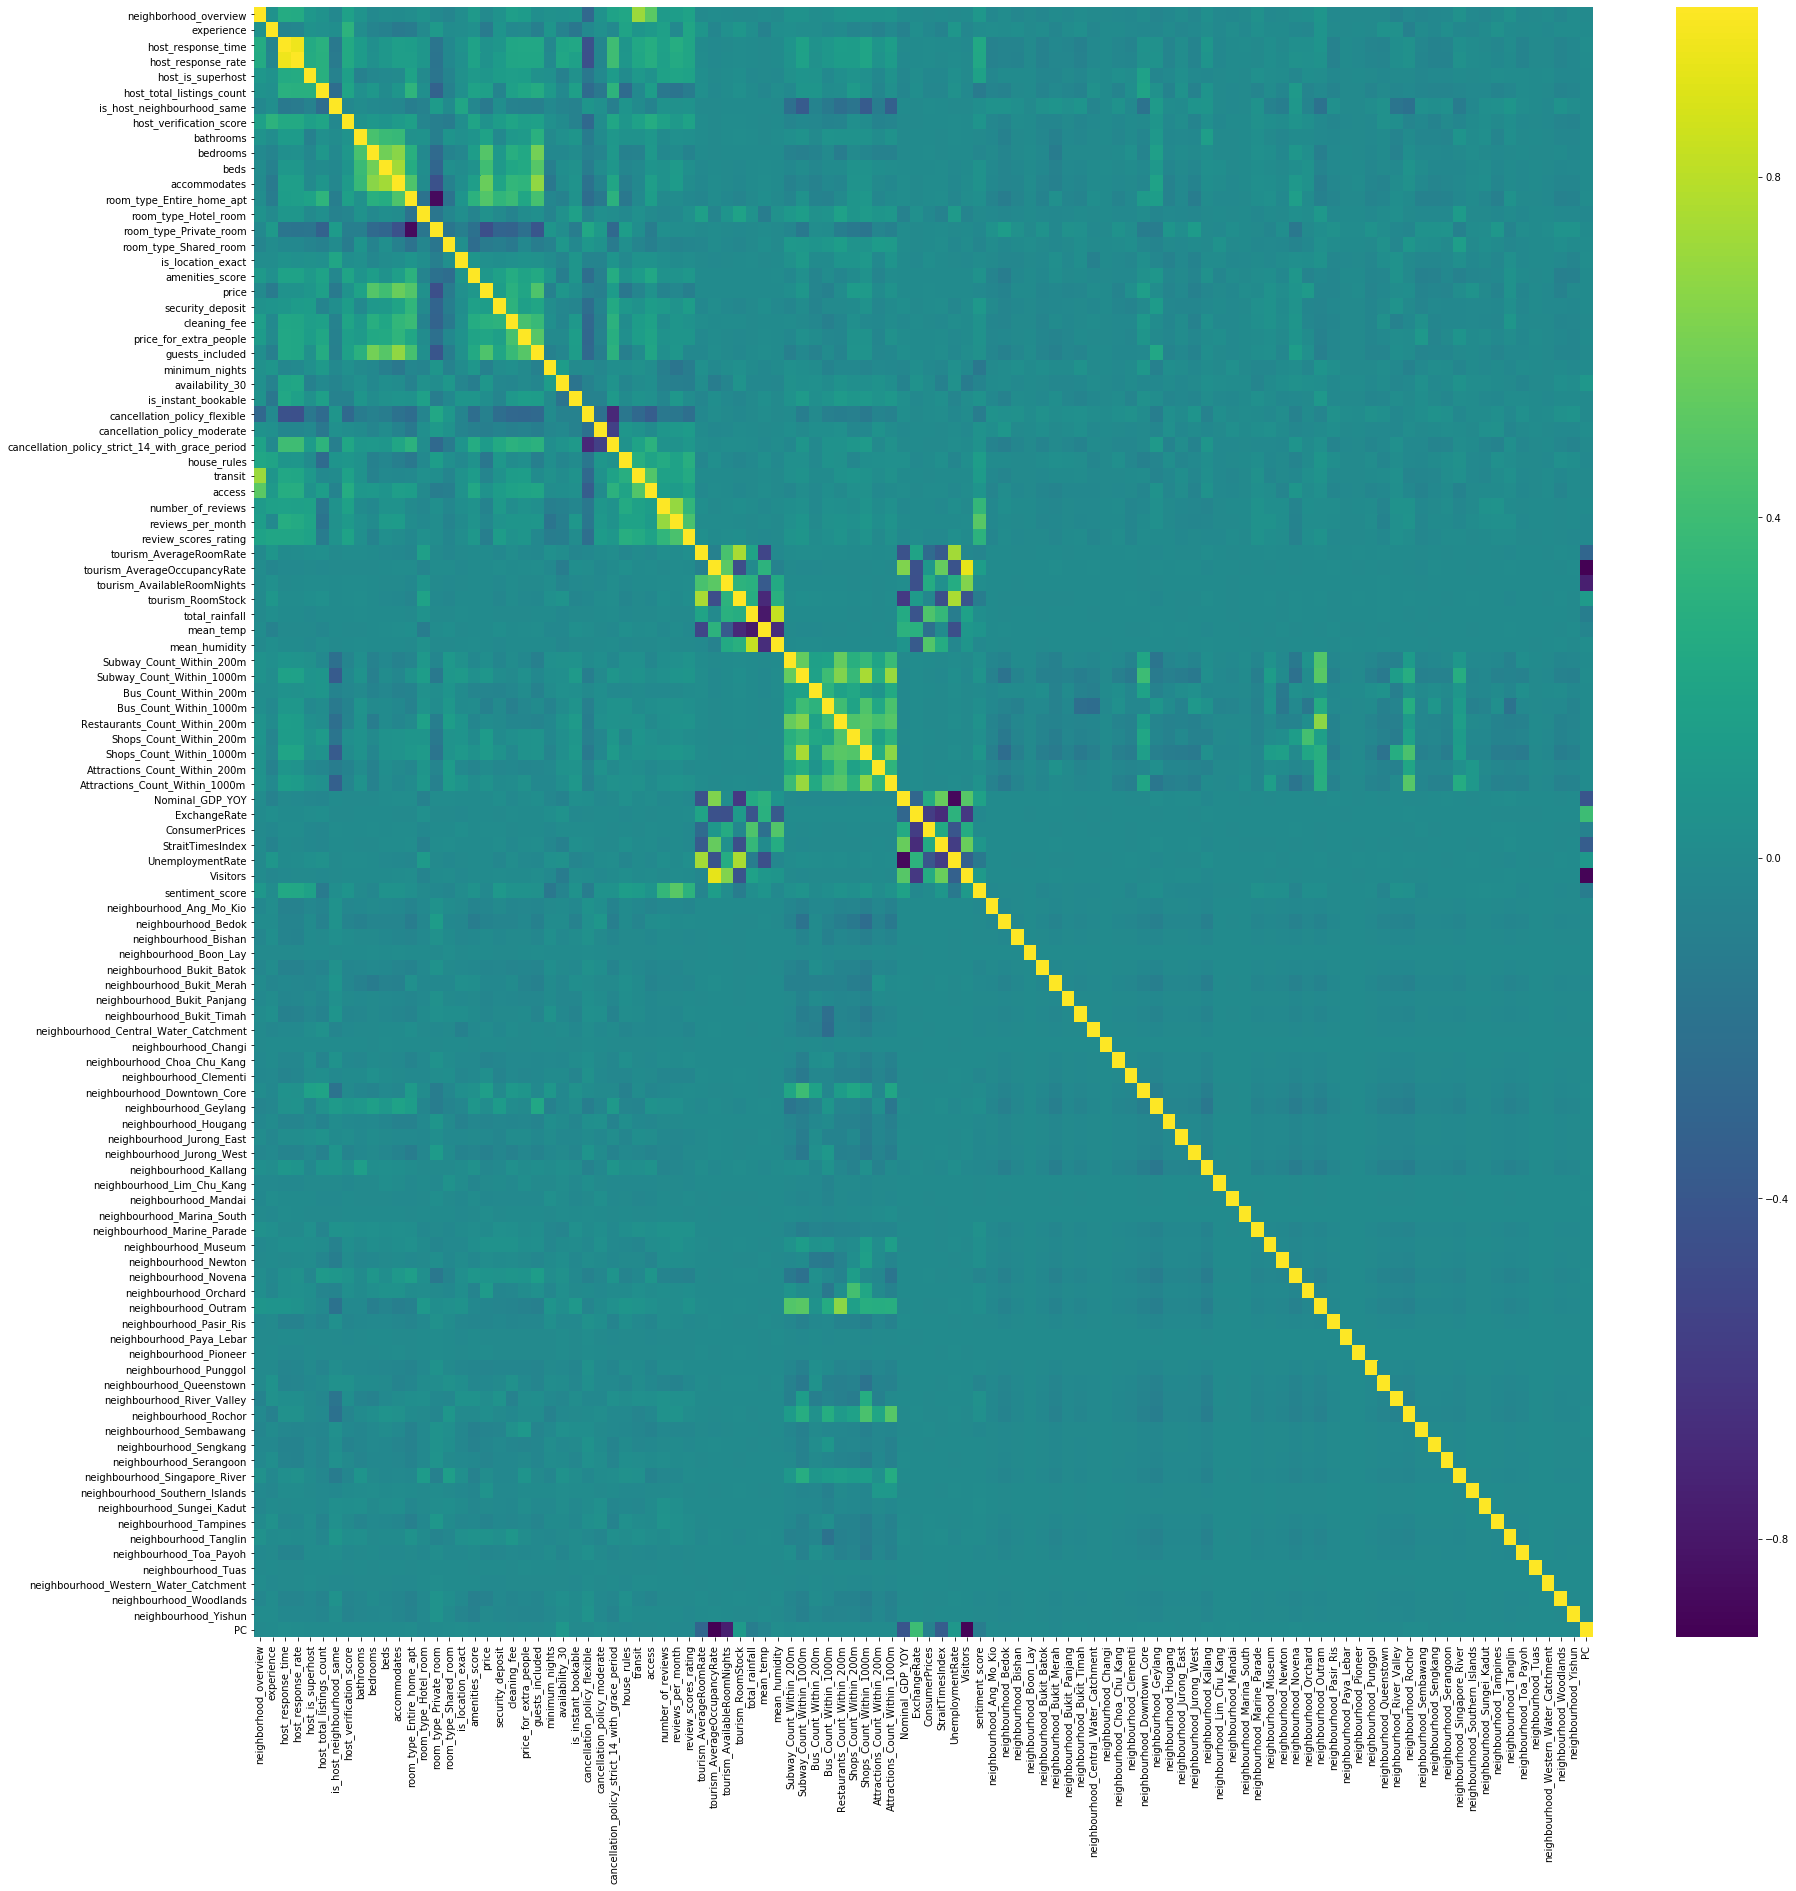

In [12]:
# correlation matrix
import seaborn as sns

corr = data[data.select_dtypes(exclude=['object','category']).columns.to_list()[1:]].corr()
corr
#corr.style.background_gradient(cmap='coolwarm').set_precision(2)
#corr.style.background_gradient(cmap='coolwarm').set_precision(2).to_excel("corr_matrix_heatmap.xlsx", engine="openpyxl")
# plot the heatmap
fig, ax = plt.subplots(figsize=(30,30))
sns_plot = sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap='viridis')

sns_plot.figure.savefig("corrmap.png")

# K-Means Clustering

In [23]:
cols = ['room_type_Entire_home_apt','room_type_Private_room','room_type_Hotel_room', 'beds', 'bedrooms', 'bathrooms', 'minimum_nights', 'price', 'neighbourhood_Downtown_Core', 'neighbourhood_Orchard', ]

In [37]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# train, test = train_test_split(data, train_size=0.8, shuffle=True) #Test set is approx 20% of total

# X = data[cols]
X = data[[x for x in data.columns if x != 'listing_id' and x!='price' and x!='last_scraped']]
# X_test, y_test = test[[x for x in data.columns if x != 'listing_id' and x!='price']], test['price']
X.head()

,neighborhood_overview,experience,host_response_time,host_response_rate,host_is_superhost,host_total_listings_count,is_host_neighbourhood_same,host_verification_score,bathrooms,bedrooms,beds,accommodates,room_type_Entire_home_apt,room_type_Hotel_room,room_type_Private_room,room_type_Shared_room,is_location_exact,amenities_score,security_deposit,cleaning_fee,price_for_extra_people,guests_included,minimum_nights,availability_30,is_instant_bookable,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,house_rules,transit,access,number_of_reviews,reviews_per_month,review_scores_rating,tourism_AverageRoomRate,tourism_AverageOccupancyRate,tourism_AvailableRoomNights,tourism_RoomStock,total_rainfall,mean_temp,mean_humidity,Subway_Count_Within_200m,Subway_Count_Within_1000m,Bus_Count_Within_200m,Bus_Count_Within_1000m,Restaurants_Count_Within_200m,Shops_Count_Within_200m,Shops_Count_Within_1000m,Attractions_Count_Within_200m,Attractions_Count_Within_1000m,Nominal_GDP_YOY,ExchangeRate,ConsumerPrices,StraitTimesIndex,UnemploymentRate,Visitors,sentiment_score,neighbourhood_Ang_Mo_Kio,neighbourhood_Bedok,neighbourhood_Bishan,neighbourhood_Boon_Lay,neighbourhood_Bukit_Batok,neighbourhood_Bukit_Merah,neighbourhood_Bukit_Panjang,neighbourhood_Bukit_Timah,neighbourhood_Central_Water_Catchment,neighbourhood_Changi,neighbourhood_Choa_Chu_Kang,neighbourhood_Clementi,neighbourhood_Downtown_Core,neighbourhood_Geylang,neighbourhood_Hougang,neighbourhood_Jurong_East,neighbourhood_Jurong_West,neighbourhood_Kallang,neighbourhood_Lim_Chu_Kang,neighbourhood_Mandai,neighbourhood_Marina_South,neighbourhood_Marine_Parade,neighbourhood_Museum,neighbourhood_Newton,neighbourhood_Novena,neighbourhood_Orchard,neighbourhood_Outram,neighbourhood_Pasir_Ris,neighbourhood_Paya_Lebar,neighbourhood_Pioneer,neighbourhood_Punggol,neighbourhood_Queenstown,neighbourhood_River_Valley,neighbourhood_Rochor,neighbourhood_Sembawang,neighbourhood_Sengkang,neighbourhood_Serangoon,neighbourhood_Singapore_River,neighbourhood_Southern_Islands,neighbourhood_Sungei_Kadut,neighbourhood_Tampines,neighbourhood_Tanglin,neighbourhood_Toa_Payoh,neighbourhood_Tuas,neighbourhood_Western_Water_Catchment,neighbourhood_Woodlands,neighbourhood_Yishun,PC
0,1,9.476712,2.0,100,0,1.0,1,5,1.0,1.0,1.0,2,0,0,1,0,1,5,0.0,0.0,20.0,2.0,90,30,0,0,1,0,1,1,1,18,0.25,91.0,225.459482,0.495256,1711438,63450,65.0,27.9,76.0,0,1,0,13,0,1,10,0,0,0.0,1.390,0.3,3011.0,3.3,732965,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1.489362e+08
1,1,9.391781,2.0,100,0,1.0,1,5,1.0,1.0,1.0,2,0,0,1,0,1,5,0.0,0.0,20.0,2.0,90,30,0,0,1,0,1,1,1,18,0.26,91.0,229.119666,0.830381,1931784,63428,88.4,27.7,77.9,0,1,0,13,0,1,10,0,0,0.0,1.351,0.8,3154.0,3.3,1688099,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.781430e+07
2,1,9.309589,0.0,0,0,1.0,1,5,1.0,1.0,1.0,2,0,0,1,0,1,5,0.0,0.0,20.0,2.0,90,30,0,0,1,0,1,1,1,18,0.26,91.0,233.790589,0.830221,1905509,62865,421.5,26.7,83.9,0,1,0,13,0,1,10,0,0,1.3,1.357,0.8,3223.0,3.2,1724961,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3.086142e+07
3,1,9.221918,0.0,0,0,1.0,1,5,1.0,1.0,1.0,2,0,0,1,0,1,5,0.0,0.0,20.0,2.0,90,30,0,0,1,0,1,1,1,18,0.26,91.0,224.603708,0.888851,1839933,62882,137.4,28.0,79.2,0,1,0,13,0,1,10,0,0,1.3,1.362,0.6,3194.0,3.2,1533668,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-2.758767e+07
4,1,9.134247,0.0,0,0,1.0,1,5,1.0,1.0,1.0,2,0,0,1,0,1,5,0.0,0.0,20.0,2.0,90,30,0,0,1,0,1,1,1,18,0.27,91.0,223.755803,0.869783,1904142,62765,176.8,28.1,78.1,0,1,0,13,0,1,10,0,0,1.3,1.371,0.5,3230.0,3.2,1530479,0.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,-3.130064e+07


In [46]:
# X = X.to_numpy()
km = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=10000, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(X)

In [47]:
np.unique(y_km)

array([0, 1, 2], dtype=int32)

KMeans(init='random', n_clusters=1, random_state=0)

KMeans(init='random', n_clusters=2, random_state=0)

KMeans(init='random', n_clusters=3, random_state=0)

KMeans(init='random', n_clusters=4, random_state=0)

KMeans(init='random', n_clusters=5, random_state=0)

KMeans(init='random', n_clusters=6, random_state=0)

KMeans(init='random', n_clusters=7, random_state=0)

KMeans(init='random', random_state=0)

KMeans(init='random', n_clusters=9, random_state=0)

KMeans(init='random', n_clusters=10, random_state=0)

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'Distortion')

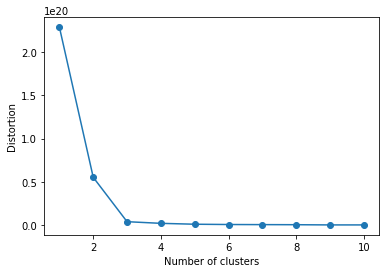

In [44]:
distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()